In [0]:
import pandas as pd
import numpy as np

#Visual
import altair as alt
import plotly
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
sns.set()

# ML library
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# cluster
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.cluster.hierarchy import dendrogram
from sklearn import cluster, mixture
from sklearn.neighbors import kneighbors_graph
from itertools import cycle, islice

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import MeanShift
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import SpectralClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import Birch
from sklearn.mixture import GaussianMixture



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In this chapter, we will be working with an open source dataset shared publicly by the
Australian Taxation Office (ATO). The dataset contains statistics about each postcode
(also known as a zip code, which is an identification code used for sorting mail by area) in
Australia during the financial year of 2014-15

# Excercise 1: cluster with 'Average net tax', 'Average total deductions'

In this exercise, we will be using k-means clustering on the ATO dataset and observing
the different clusters that the dataset divides itself into, after which we will conclude by
analyzing the output:

In [0]:
file_url = 'https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter05/DataSet/taxstats2015.csv'

In [0]:
df = pd.read_csv(file_url)
df

1   6   4  12   5   5   3   4   1  67   3   2   1   2   1   0   0   1   0   0   1   0   0   1   1 
0       2  48   2  60   1   3   2   2   1  22   3  ...                                                   
1       4  12   4  21   1   4   3   3   1  49   3  ...                                                   
2       1  42   2  79   1   4   3   4   2  45   3  ...                                                   
3       1  24   3  49   1   3   3   4   4  53   3  ...                                                   
4       4  36   2  91   5   3   3   4   4  35   3  ...                                                   
..                                                 ...                                                   
994     4  12   2  17   1   4   2   4   1  31   3  ...                                                   
995     1  30   2  39   1   3   1   4   2  40   3  ...                                                   
996     4  12   2   8   1   5   3   4   3  38   3  ...                                                   
997     1  45   2  18   1   3   3   4   4  23   3  ...                                                   
998     2  45   4  46   2   1   3   4   3  27   3  ...                                                   

[999 rows x 1 columns]

In [0]:
kmeans = KMeans(random_state=42)

In [0]:
X = df[['Average net tax', 'Average total deductions']]

In [0]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [0]:
y_preds = kmeans.predict(X)
y_preds

array([6, 6, 5, ..., 5, 6, 5], dtype=int32)

In [0]:
df['cluster'] = y_preds
df.head()

Postcode  ...  cluster
0      2000  ...        6
1      2006  ...        6
2      2007  ...        5
3      2008  ...        7
4      2009  ...        2

[5 rows x 29 columns]

Generate a pivot table with the averages of the two columns for each cluster
value using the pivot_table method from the pandas package with the
following parameters:

In [0]:
df.pivot_table(values=['Average net tax', 'Average total deductions'], index='cluster',
aggfunc=np.mean)

Average net tax  Average total deductions
cluster                                           
0           10126.249641               2176.045911
1           20474.671096               2909.352159
2           36197.407895               4789.328947
3           13016.528477               2480.054305
4           77733.111111              12523.111111
5           16391.342495               2657.048626
6           26765.963235               3498.676471
7           50887.692308               6156.961538

In this summary, we can see that the algorithm has grouped the data into eight clusters
(clusters 0 to 7). Cluster 0 has the lowest average net tax and total deductions amounts
among all the clusters, while cluster 4 has the highest values. With this pivot table, we
are able to compare clusters between them using their summarised values.
Using an aggregated view of clusters is a good way of seeing the difference between
them, but it is not the only way. Another possibility is to visualize clusters in a graph.

This is exactly what we are going to do now.
You may have heard of different visualization packages, such as matplotlib, seaborn, and
bokeh, but in this chapter, we will be using the altair package because it is quite simple
to use (its API is very similar to sklearn). Let's import it first:

In [0]:
chart = alt.Chart(df).mark_circle()
chart.encode(x='Average net tax', y='Average total deductions',color='cluster:N',
tooltip=['Postcode', 'cluster', 'Average net tax', 'Average total deductions']).interactive()

Output hidden; open in https://colab.research.google.com to view.

We can now easily see what the clusters in this graph are and how they differ from
each other. We can clearly see that k-means assigned data points to each cluster mainly
based on the x-axis variable, which is Average net tax. The boundaries of the clusters
are vertical straight lines. For instance, the boundary separating the red and purple
clusters is roughly around 18,000. Observations below this limit are assigned to the red
cluster (2) and those above to the purple cluster (6).

# Excercise 2:  Clustering Australian Postcodes by Business Income and Expenses

In [0]:
X = df[['Average total business income', 'Average total business expenses']]
X.head()

Average total business income  Average total business expenses
0                         210901                           222191
1                          69983                            48971
2                         575099                           639499
3                          53329                            32173
4                         237539                           222993

In [0]:
kmeans = KMeans(random_state=8)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=8, tol=0.0001, verbose=0)

In [0]:
y_preds = kmeans.predict(X)
y_preds[-10:]

array([3, 0, 0, 1, 6, 0, 0, 0, 0, 3], dtype=int32)

In [0]:

df['cluster'] = y_preds
df.tail(10)

Postcode  ...  cluster
2463       852  ...        3
2464       853  ...        0
2465       854  ...        0
2466       860  ...        1
2467       862  ...        6
2468       870  ...        0
2469       872  ...        0
2470       880  ...        0
2471       885  ...        0
2472       886  ...        3

[10 rows x 29 columns]

Generate a pivot table with the averages of the two columns for each cluster
value using the pivot_table method from the pandas package with the
following parameters:

In [0]:
df.pivot_table(values=['Average total business income', 'Average total business expenses'],
               index='cluster', aggfunc=np.mean)

Average total business expenses  Average total business income
cluster                                                                
0                           38130.124827                   53608.097087
1                           58310.891111                   76449.391111
2                          250410.190476                  301417.809524
3                           82319.305970                  104102.712687
4                          812481.333333                  837920.333333
5                          173350.259740                  208767.740260
6                          118572.299517                  145933.570048
7                          449722.500000                  488551.625000

In [0]:
scatter_plot = alt.Chart(df).mark_circle()

In [0]:
scatter_plot.encode(x='Average total business income',
                    y='Average total business expenses', 
                    color='cluster:N', 
                    tooltip=['Postcode', 'cluster', 'Average total business income', 'Average total business expenses']).interactive()

Output hidden; open in https://colab.research.google.com to view.

# Exercise 3: Finding the Optimal Number of Clusters

In [0]:
df = pd.read_csv(file_url, usecols=['Postcode', 'Average total business income',
'Average total business expenses'])
df.head()

Postcode  Average total business income  Average total business expenses
0      2000                         210901                           222191
1      2006                          69983                            48971
2      2007                         575099                           639499
3      2008                          53329                            32173
4      2009                         237539                           222993

In [0]:
X = df[['Average total business income', 'Average total business expenses']]

In [0]:
clusters = pd.DataFrame()
inertia = []

In [0]:
clusters['cluster_range'] = range(1, 15)

In [0]:
for k in clusters['cluster_range']:
  kmeans = KMeans(n_clusters=k).fit(X)
  inertia.append(kmeans.inertia_)

In [0]:
clusters['inertia'] = inertia
clusters

cluster_range       inertia
0               1  1.333516e+13
1               2  7.063097e+12
2               3  3.718740e+12
3               4  2.341877e+12
4               5  1.713807e+12
5               6  1.224603e+12
6               7  9.422763e+11
7               8  7.489011e+11
8               9  6.346995e+11
9              10  5.637951e+11
10             11  5.107272e+11
11             12  4.629442e+11
12             13  4.193596e+11
13             14  3.978976e+11

kmeans.inertia_: Sum of squared distances of samples to their closest cluster center.

In [0]:
alt.Chart(clusters).mark_line().encode(alt.X('cluster_range'), alt.Y('inertia'))

alt.Chart(...)

Looking at the Elbow plot, identify the optimal number of clusters, and assign this
value to a variable called optim_cluster:

In [0]:
optim_cluster = 4
kmeans = KMeans(random_state=42, n_clusters=optim_cluster)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [0]:
df['cluster2'] = kmeans.predict(X)
df.head()

Postcode  ...  cluster2
0      2000  ...         3
1      2006  ...         0
2      2007  ...         2
3      2008  ...         0
4      2009  ...         3

[5 rows x 4 columns]

In [0]:
alt.Chart(df).mark_circle().encode(x='Average total business income', 
                                   y='Average total business expenses',
                                   color='cluster2:N', 
                                   tooltip=['Postcode', 'cluster2','Average total business income',
                                            'Average total business expenses']).interactive()

alt.Chart(...)

• Cluster 0 (blue) is for all the observations with average total business income values
lower than 100,000 and average total business expense values lower than 80,000.

• Cluster 3 (cyan) is grouping data points that have an average total business
income value lower than 180,000 and average total business expense values
lower than 160,000.

• Cluster 1 (orange) is for data points that have an average total business income
value lower than 370,000 and average total business expense values lower
than 330,000.

• Cluster 2 (red) is for data points with extreme values – those with average total
business income values higher than 370,000 and average total business expense
values higher than 330,000.

The results from Exercise 5.02, Clustering Australian Postcodes by Business Income
and Expenses, have eight different clusters, and some of them are very similar to
each other. Here, you saw that having the optimal number of clusters provides better
differentiation between the groups, and this is why it is one of the most important
hyperparameters to be tuned for k-means. In the next section, we will look at two other
important hyperparameters for initializing k-means.

# Exercise 4: Using Different Initialization Parameters to Achieve a Suitable Outcome

In [0]:
X = df[['Average total business income', 'Average total business expenses']]

init= '' : Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.

In [0]:
kmeans = KMeans(random_state=1, n_clusters=4, init='random', n_init=1)
kmeans.fit(X)
df['cluster3'] = kmeans.predict(X)

alt.Chart(df).mark_circle().encode(x='Average total business income', 
                                   y='Average total business expenses',color='cluster3:N',
tooltip=['Postcode', 'cluster3', 'Average total business income', 'Average total business expenses']
).interactive()

alt.Chart(...)

In [0]:
kmeans = KMeans(random_state=1, n_clusters=4, init='random', n_init=10)
kmeans.fit(X)
df['cluster4'] = kmeans.predict(X)

alt.Chart(df).mark_circle().encode(x='Average total business income', 
                                   y='Average total business expenses',color='cluster4:N',
tooltip=['Postcode', 'cluster4', 'Average total business income', 'Average total business expenses']
).interactive()

alt.Chart(...)

In [0]:
kmeans = KMeans(random_state=1, n_clusters=4, init='random', n_init=100)
kmeans.fit(X)
df['cluster5'] = kmeans.predict(X)

alt.Chart(df).mark_circle().encode(x='Average total business income', 
                                   y='Average total business expenses',color='cluster5:N',
tooltip=['Postcode', 'cluster5', 'Average total business income', 'Average total business expenses']
).interactive()

alt.Chart(...)

You just learned how to tune the two main hyperparameters responsible for initializing
k-means clusters. You have seen in this exercise that increasing the number of
iterations with n_init didn't have much impact on the clustering result for this dataset.
In this case, it is better to use a lower value for this hyperparameter as it will speed
up the training time. But for a different dataset, you may face a case where the results
differ drastically depending on the n_init value. In such a case, you will have to find
a value of n_init that is not too small but also not too big. You want to find the sweet
spot where the results do not change much compared to the last result obtained with a
different value.

# Calculating the Distance to the Centroid

In [0]:
X = df[['Average net tax', 'Average total deductions']]

In [0]:
kmeans = KMeans(random_state=42, n_clusters=3, init='k-means++', n_init=5)
kmeans.fit(X)
df['cluster6'] = kmeans.predict(X)

In [0]:
centroids = kmeans.cluster_centers_
centroids = pd.DataFrame(centroids, columns=['Average net tax', 'Average total deductions'])
print(centroids)

   Average net tax  Average total deductions
0     21645.622924               3054.901993
1     12395.607303               2383.760674
2     45279.802198               6067.000000


In [0]:
chart1 = alt.Chart(df).mark_circle().encode(x='Average net tax', y='Average total deductions',color='cluster6:N',
tooltip=['Postcode', 'cluster6', 'Average net tax', 'Average total deductions']
).interactive()
chart1

Output hidden; open in https://colab.research.google.com to view.

In [0]:
chart2 = alt.Chart(centroids).mark_circle(size=100).encode(x='Average net tax',
y='Average total deductions', color=alt.value('black'),
tooltip=['Average net tax', 'Average total deductions']).interactive()
chart2

alt.Chart(...)

In [0]:
chart1 + chart2

Output hidden; open in https://colab.research.google.com to view.

# Exercise 5: Finding the Closest Centroids in Our Dataset

In [0]:

df = pd.read_csv(file_url, usecols=['Postcode', 'Average total business income', 'Average total business expenses'])

In [0]:
X = df[['Average total business income', 'Average total business expenses']]

business_income_min = df['Average total business income'].min()
business_income_max = df['Average total business income'].max()
business_expenses_min = df['Average total business expenses'].min()
business_expenses_max = df['Average total business expenses'].max()

print(business_income_min)
print(business_income_max)
print(business_expenses_min)
print(business_expenses_max)

0
876324
0
884659


In [0]:
import random
random.seed(42)
centroids = pd.DataFrame()

centroids['Average total business income'] = random.sample(range(business_income_min, 
                                                                 business_income_max), 4)

centroids['Average total business expenses'] = random.sample(range(business_expenses_min,
                                                                   business_expenses_max), 4)

centroids['cluster'] = centroids.index
centroids

Average total business income  Average total business expenses  cluster
0                         670487                           288389        0
1                         116739                           256787        1
2                          26225                           234053        2
3                         777572                           146316        3

In [0]:
df

Postcode  Average total business income  Average total business expenses
0         2000                         210901                           222191
1         2006                          69983                            48971
2         2007                         575099                           639499
3         2008                          53329                            32173
4         2009                         237539                           222993
...        ...                            ...                              ...
2468       870                          62793                            44687
2469       872                          53025                            45670
2470       880                          45603                            28700
2471       885                          53148                            39850
2472       886                         121057                            90120

[2473 rows x 3 columns]

In [0]:

chart1 = alt.Chart(df.head()).mark_circle().encode(x='Average total business income', y='Average total business expenses', 
    color=alt.value('orange'),
    tooltip=['Postcode', 'Average total business income', 'Average total business expenses']
).interactive()
chart1

alt.Chart(...)

In [0]:
chart2 = alt.Chart(centroids).mark_circle(size=100).encode(x='Average total business income',
                                                           y='Average total business expenses',
color=alt.value('black'),
tooltip=['cluster', 'Average total business income', 'Average total business expenses']
).interactive()

chart1 + chart2

alt.LayerChart(...)

In [0]:
def squared_euclidean(data_x, data_y, centroid_x, centroid_y, ):
  return (data_x - centroid_x)**2 + (data_y - centroid_y)**2

In [0]:
data_x = df.at[0, 'Average total business income']
data_y = df.at[0, 'Average total business expenses']
print(data_x)
print(data_y)

210901
222191


In [0]:
distances = [squared_euclidean(data_x, data_y,
                               centroids.at[i, 'Average total business income'],
                               centroids.at[i, 'Average total business expenses']) for i in range(4)]
distances

[215601466600, 10063365460, 34245932020, 326873037866]

In [0]:
cluster_index = distances.index(min(distances))
df.at[0, 'cluster'] = cluster_index
df.head()

Postcode  ...  cluster
0      2000  ...      1.0
1      2006  ...      NaN
2      2007  ...      NaN
3      2008  ...      NaN
4      2009  ...      NaN

[5 rows x 4 columns]

In [0]:
distances = [squared_euclidean(df.at[1, 'Average total business income'], df.at[1, 'Average total business expenses'], centroids.at[i, 'Average total business income'], centroids.at[i, 'Average total business expenses']) for i in range(4)]
df.at[1, 'cluster'] = distances.index(min(distances))

distances = [squared_euclidean(df.at[2, 'Average total business income'], df.at[2, 'Average total business expenses'], centroids.at[i, 'Average total business income'], centroids.at[i, 'Average total business expenses']) for i in range(4)]
df.at[2, 'cluster'] = distances.index(min(distances))

distances = [squared_euclidean(df.at[3, 'Average total business income'], df.at[3, 'Average total business expenses'], centroids.at[i, 'Average total business income'], centroids.at[i, 'Average total business expenses']) for i in range(4)]
df.at[3, 'cluster'] = distances.index(min(distances))

distances = [squared_euclidean(df.at[4, 'Average total business income'], df.at[4, 'Average total business expenses'], centroids.at[i, 'Average total business income'], centroids.at[i, 'Average total business expenses']) for i in range(4)]
df.at[4, 'cluster'] = distances.index(min(distances))

df.head()

Postcode  ...  cluster
0      2000  ...      1.0
1      2006  ...      2.0
2      2007  ...      0.0
3      2008  ...      2.0
4      2009  ...      1.0

[5 rows x 4 columns]

In [0]:
chart1 = alt.Chart(df.head()).mark_circle().encode(x='Average total business income', y='Average total business expenses', 
    color='cluster:N',
    tooltip=['Postcode', 'cluster', 'Average total business income', 'Average total business expenses']
).interactive()

chart2 = alt.Chart(centroids).mark_circle(size=100).encode(x='Average total business income', y='Average total business expenses', 
    color=alt.value('black'),
    tooltip=['cluster', 'Average total business income', 'Average total business expenses']
).interactive()
chart1 + chart2

alt.LayerChart(...)

In this final result, we can see where the four clusters have been placed in the graph
and which cluster the five data points have been assigned to:

• The two data points in the bottom-left corner have been assigned to cluster 2,
which corresponds to the one with a centroid of coordinates of 26,000 (average
total business income) and 234,000 (average total business expense). It is the
closest centroid for these two points.

• The two observations in the middle are very close to the centroid with coordinates
of 116,000 (average total business income) and 256,000 (average total business
expense), which corresponds to cluster 1.

• The observation at the top has been assigned to cluster 0, whose centroid has
coordinates of 670,000 (average total business income) and 288,000 (average total
business expense).

You just re-implemented a big part of the k-means algorithm from scratch. You went
through how to randomly initialize centroids (cluster centers), calculate the squared
Euclidean distance for some data points, find their closest centroid, and assign them to
the corresponding cluster. This wasn't easy, but you made it

# Exercise 5.06: Standardizing the Data from Our Dataset

Squared Euclidean distance is weighted more toward high-value variables. Let's take
an example to illustrate this point with two data points called A and B with respective
x and y coordinates of (1, 50000) and (100, 100000). The squared Euclidean distance
between A and B will be (100000 - 50000)^2 + (100 - 1)^2. We can clearly see that the
result will be mainly driven by the difference between 100,000 and 50,000: 50,000^2.
The difference of 100 minus 1 (99^2) will account for very little in the final result.

In [0]:
df = pd.read_csv(file_url, usecols=['Postcode', 'Average total business income', 'Average total business expenses'])

In [0]:
X = df[['Average total business income', 'Average total business expenses']]

In [0]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [0]:
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(X)

X_min_max = min_max_scaler.transform(X)
X_min_max

kmeans = KMeans(random_state=1, n_clusters=4, init='k-means++', n_init=5)
kmeans.fit(X_min_max)
df['cluster8'] = kmeans.predict(X_min_max)

In [0]:
scatter_plot = alt.Chart(df).mark_circle()
scatter_plot.encode(x='Average total business income', y='Average total business expenses',color='cluster8:N',
    tooltip=['Postcode', 'cluster8', 'Average total business income', 'Average total business expenses']
).interactive()

alt.Chart(...)

In [0]:
standard_scaler = StandardScaler()
X_scaled = standard_scaler.fit_transform(X)
kmeans = KMeans(random_state=1, n_clusters=4, init='k-means++', n_init=5)
kmeans.fit(X_scaled)

df['cluster9'] = kmeans.predict(X_scaled)

In [0]:

scatter_plot = alt.Chart(df).mark_circle()
scatter_plot.encode(x='Average total business income', y='Average total business expenses',color='cluster9:N',
    tooltip=['Postcode', 'cluster9', 'Average total business income', 'Average total business expenses']
).interactive()

alt.Chart(...)

The k-means clustering results are very similar between min-max and z-score
standardization, which are the outputs for Steps 10 and 13. Compared to the results in
Exercise 5.04, Using Different Initialization Parameters to Achieve a Suitable Outcome,
we can see that the boundaries between clusters 1 and 2 are slightly lower after
standardization; indeed, the blue cluster has switched places in the output. If you look
at Figure 5.31 of Exercise 5.04, Using Different Initialization Parameters to Achieve a
Suitable Outcome, you will notice the switch in cluster 0 (blue) when compared to Figure
5.54 of Exercise 5.05, Finding the Closest Centroids in Our Dataset. The reason why
these results are very close to each other is due to the fact that the range of values for
the two variables (average total business income and average total business expenses)
are almost identical: between 0 and 900,000. Therefore, k-means is not putting more
weight toward one of these variables.

# Activity 5.01: Perform Customer Segmentation Analysis in a Bank

You are working for an international bank. The credit department is reviewing its
offerings and wants to get a better understanding of its current customers. You have
been tasked with performing customer segmentation analysis. You will perform cluster
analysis with k-means to identify groups of similar customers

https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)

In [0]:
file_url = 'https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter05/DataSet/german.data-numeric'
df = pd.read_csv(file_url, header=None, sep='\s\s+', prefix='X')
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.



X0  X1 X2  X3  X4  X5  X6  X7  ...  X17  X18  X19  X20  X21  X22  X23  X24
0   1   6  4  12   5   5   3   4  ...    1    0    0    1    0    0    1  1.0
1   2  48  2  60   1   3   2   2  ...    1    0    0    1    0    0    1  2.0
2   4  12  4  21   1   4   3   3  ...    1    0    0    1    0    1    0  1.0
3   1  42  2  79   1   4   3   4  ...    0    0    0    0    0    0    1  1.0
4   1  24  3  49   1   3   3   4  ...    1    0    0    0    0    0    1  2.0

[5 rows x 25 columns]

In [0]:
X = df[['X3', 'X9']]
standard_scaler = StandardScaler()
X_scaled = standard_scaler.fit_transform(X)

## Kmeans

In [0]:
clusters = pd.DataFrame()
inertia = []
clusters['cluster_range'] = range(1, 15)

for k in clusters['cluster_range']:
    kmeans = KMeans(n_clusters=k, random_state=8).fit(X_scaled)
    inertia.append(kmeans.inertia_)

clusters['inertia'] = inertia
clusters

cluster_range      inertia
0               1  2000.000000
1               2  1280.612749
2               3   767.637196
3               4   576.086134
4               5   443.905649
5               6   360.418261
6               7   291.393050
7               8   252.709449
8               9   219.498996
9              10   193.015983
10             11   174.554284
11             12   159.035228
12             13   147.613182
13             14   135.283361

In [0]:
alt.Chart(clusters).mark_line().encode(alt.X('cluster_range'), alt.Y('inertia'))

alt.Chart(...)

Choose number of cluster by sklearn silhouette:

### Silhouette for choosing number of cluster

For n_clusters = 2 The average silhouette_score is : 0.5362375229214517
For n_clusters = 3 The average silhouette_score is : 0.381016808479933
For n_clusters = 4 The average silhouette_score is : 0.4137522092265234
For n_clusters = 5 The average silhouette_score is : 0.4486243116570937
For n_clusters = 6 The average silhouette_score is : 0.40495707883275284


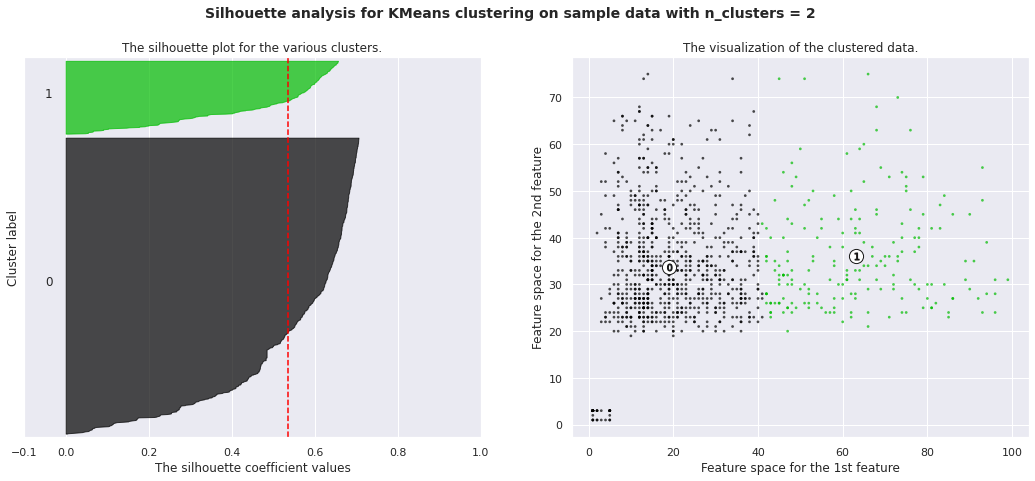

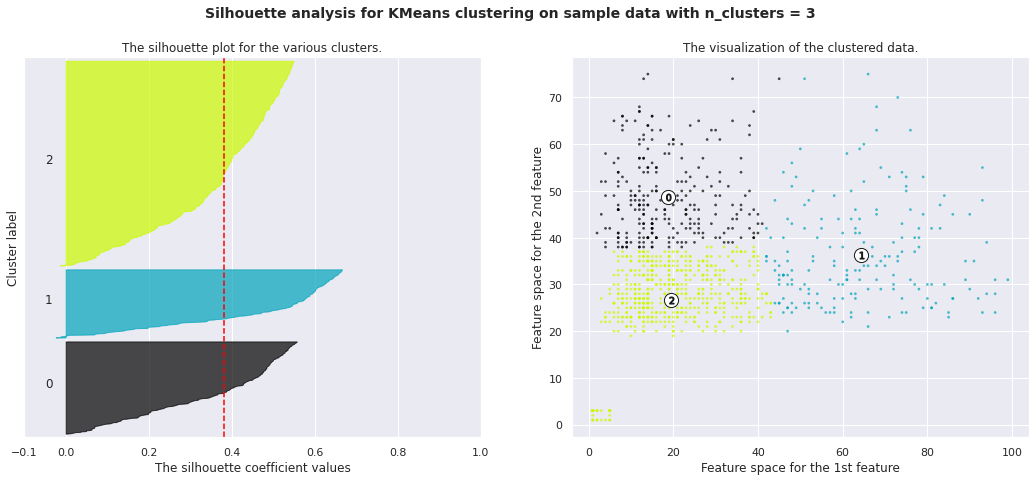

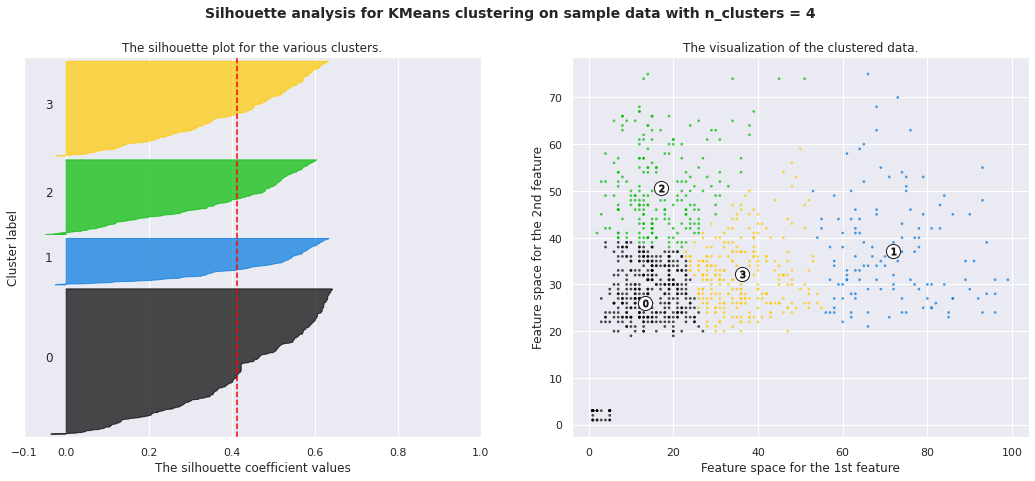

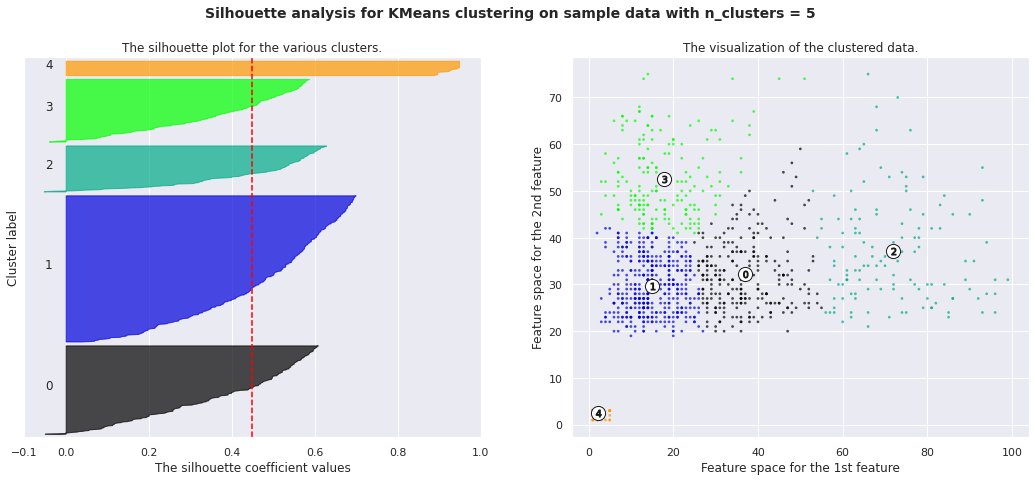

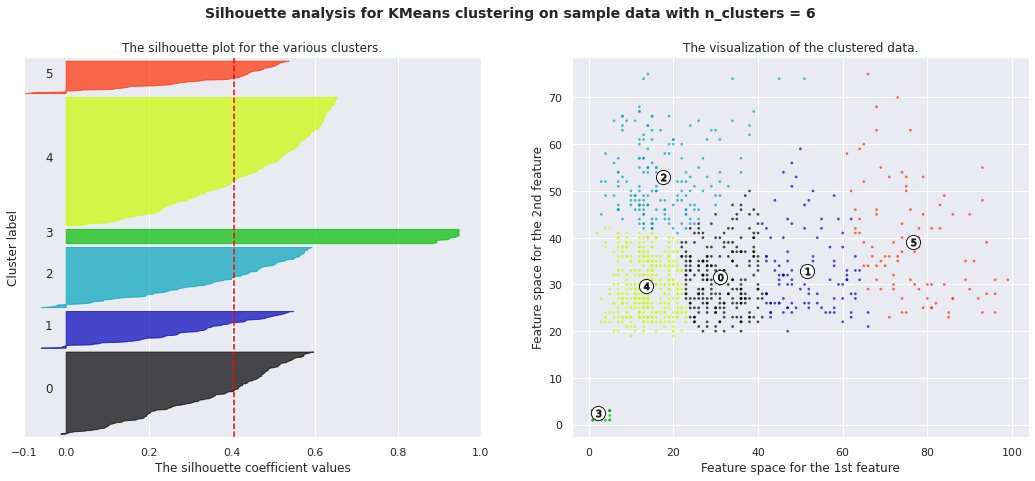

In [0]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X['X3'], X['X9'], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

### Plot altair

In [0]:
clusters_number = 5
kmeans = KMeans(random_state=1, n_clusters=clusters_number, init='k-means++',
                n_init=50, max_iter=1000)
kmeans.fit(X_scaled)
df['cluster'] = kmeans.predict(X_scaled)

In [0]:
centroids = kmeans.cluster_centers_
centroids = pd.DataFrame(centroids, columns=['X3', 'X9'])
print(centroids)

         X3        X9
0  2.120025  0.269530
1 -0.609786 -0.345153
2 -0.360708  1.402672
3 -1.212705 -2.452428
4  0.453083 -0.292360


In [0]:
centroids_inverse=standard_scaler.inverse_transform(centroids)
centroids_inverse = pd.DataFrame(centroids_inverse, columns=['X3', 'X9'])
centroids_inverse

X3         X9
0  72.008000  37.616000
1  14.884804  29.688725
2  20.096939  52.229592
3   2.268293   2.512195
4  37.126087  30.369565

In [0]:
chart1=alt.Chart(df).mark_circle().encode(x='X3', y='X9',color='cluster:N',
                    tooltip=['X3','X9']).interactive()

chart2 = alt.Chart(centroids_inverse).mark_circle(size=100).encode(x='X3',
y='X9', color=alt.value('black'),
tooltip=['X3', 'X9']).interactive()

chart1 + chart2

alt.LayerChart(...)

### Other method plot (best)

In [0]:
file_url = 'https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter05/DataSet/german.data-numeric'

df = pd.read_csv(file_url, header=None, sep='\s\s+', prefix='X')
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.



X0  X1 X2  X3  X4  X5  X6  X7  ...  X17  X18  X19  X20  X21  X22  X23  X24
0   1   6  4  12   5   5   3   4  ...    1    0    0    1    0    0    1  1.0
1   2  48  2  60   1   3   2   2  ...    1    0    0    1    0    0    1  2.0
2   4  12  4  21   1   4   3   3  ...    1    0    0    1    0    1    0  1.0
3   1  42  2  79   1   4   3   4  ...    0    0    0    0    0    0    1  1.0
4   1  24  3  49   1   3   3   4  ...    1    0    0    0    0    0    1  2.0

[5 rows x 25 columns]

In [0]:
X = df[['X3', 'X9']]
standard_scaler = StandardScaler()
X_scaled = standard_scaler.fit_transform(X)
X_scaled

array([[-0.74764519,  2.54797287],
       [ 1.54618474, -0.94133873],
       [-0.31755208,  1.15224823],
       ...,
       [-0.93879769,  0.29930539],
       [-0.46091645, -0.86379847],
       [ 0.87715101, -0.55363744]])

In [0]:
clusters_number = 5
kmeans = KMeans(random_state=1, n_clusters=clusters_number, init='k-means++', n_init=50, max_iter=1000)
kmeans.fit(X_scaled)
cluster=kmeans.predict(X_scaled)

unique_labels = set(cluster)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
print(unique_labels)
print(colors)

{0, 1, 2, 3, 4}
[(0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0), (0.9748558246828143, 0.5574009996155325, 0.32272202998846594, 1.0), (0.998077662437524, 0.9992310649750096, 0.7460207612456747, 1.0), (0.5273356401384084, 0.8106113033448674, 0.6452133794694349, 1.0), (0.3686274509803922, 0.30980392156862746, 0.6352941176470588, 1.0)]


In [0]:
centroids = kmeans.cluster_centers_
centroids_inverse=standard_scaler.inverse_transform(centroids)
centroids_inverse = pd.DataFrame(centroids_inverse, columns=['X3', 'X9'])
centroids_inverse

X3         X9
0  72.008000  37.616000
1  14.884804  29.688725
2  20.096939  52.229592
3   2.268293   2.512195
4  37.126087  30.369565

In [0]:
k_means_cluster_centers=kmeans.cluster_centers_
k_means_labels = pairwise_distances_argmin(X_scaled, k_means_cluster_centers)
#k_means_labels = pairwise_distances_argmin(X, k_means_cluster_centers)

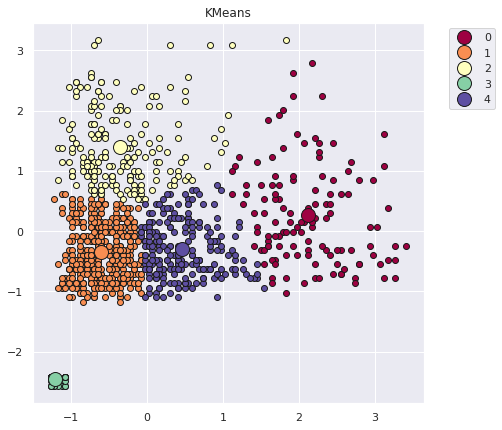

In [0]:
fig,ax=plt.subplots(figsize=(7,7))
for k, col in zip(range(clusters_number), colors):
    my_members = k_means_labels == k #separate each cluster (true, false,true....)
    cluster_center = k_means_cluster_centers[k]
    #plot point
    ax.plot(X_scaled[my_members, 0], X_scaled[my_members, 1], 'o', 
            markerfacecolor=tuple(col),
            markeredgecolor='k', markersize=6
            )
    #plot center
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=14,label=k)
    
ax.set_title('KMeans')
#ax.set_xticks(())
#ax.set_yticks(())
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

### Decision Boundaries

In [0]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

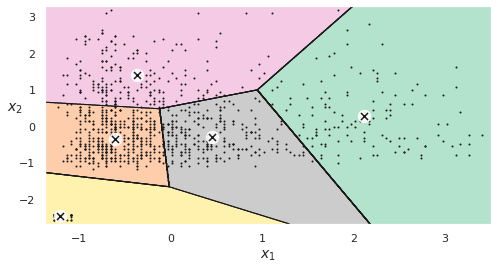

In [0]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X_scaled)
#save_fig("voronoi_plot")
plt.show()

## Hierarchical clustering

In [0]:
X_scaled.shape

(1000, 2)

In [0]:
ac = AgglomerativeClustering(n_clusters=5,
                             affinity='euclidean',
                             linkage='complete')
df['cluster_ac'] = ac.fit_predict(X_scaled)

In [0]:
chart1=alt.Chart(df).mark_circle().encode(x='X3', y='X9',color='cluster_ac:N',
                    tooltip=['X3','X9']).interactive()

chart1

alt.Chart(...)

Other plot

In [0]:
clusters_number = 5
ac = AgglomerativeClustering(n_clusters=5,
                             affinity='euclidean',
                             linkage='complete')
#ac.fit(X_scaled)
cluster=ac.fit_predict(X_scaled)

unique_labels = set(cluster)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
print(unique_labels)
print(colors)

{0, 1, 2, 3, 4}
[(0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0), (0.9748558246828143, 0.5574009996155325, 0.32272202998846594, 1.0), (0.998077662437524, 0.9992310649750096, 0.7460207612456747, 1.0), (0.5273356401384084, 0.8106113033448674, 0.6452133794694349, 1.0), (0.3686274509803922, 0.30980392156862746, 0.6352941176470588, 1.0)]


In [0]:
cluster[:10]

array([1, 2, 1, 0, 0, 0, 1, 0, 3, 2])

In [0]:
X

X3  X9
0    12  67
1    60  22
2    21  49
3    79  45
4    49  53
..   ..  ..
995  17  31
996  39  40
997   8  38
998  18  23
999  46  27

[1000 rows x 2 columns]

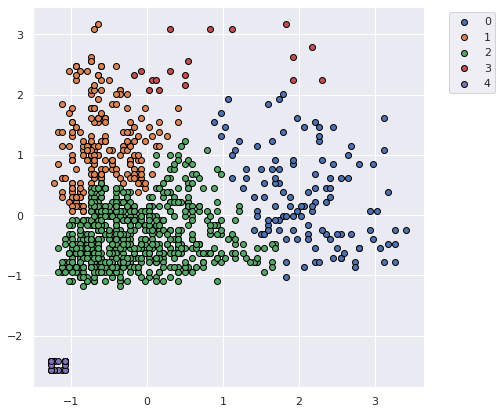

In [0]:
fig,ax=plt.subplots(figsize=(7,7))
for k in range(clusters_number):
  plt.scatter(X_scaled[cluster==k, 0],X_scaled[cluster==k, 1], 
              edgecolor='black',marker='o',label=k)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

Plot Hierarchical Clustering Dendrogram

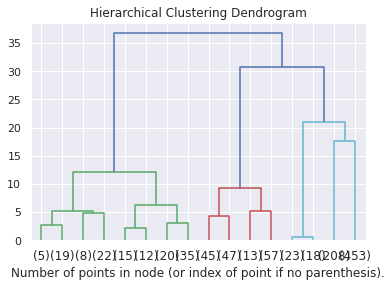

In [0]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X_scaled)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

## DBSCANE

In [0]:
n=0.2

In [0]:
# Compute DBSCAN
db = DBSCAN(eps=n, min_samples=10).fit(X_scaled)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
print(core_samples_mask.shape)
print(labels.shape)
df['cluster_dbscame']=labels
df['cluster_dbscame'].value_counts()


(1000,)
(1000,)


 0    702
-1    237
 1     41
 2     13
 3      7
Name: cluster_dbscame, dtype: int64

- eps: float, default=0.5

The maximum distance between two samples for one to be considered as in the neighborhood of the other. This is not a maximum bound on the distances of points within a cluster. This is the most important DBSCAN parameter to choose appropriately for your data set and distance function.

- min_samples: int, default=5

The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself.

unique_labels {0, 1, 2, 3, -1}
colors [(0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0), (0.9748558246828143, 0.5574009996155325, 0.32272202998846594, 1.0), (0.998077662437524, 0.9992310649750096, 0.7460207612456747, 1.0), (0.5273356401384084, 0.8106113033448674, 0.6452133794694349, 1.0), (0.3686274509803922, 0.30980392156862746, 0.6352941176470588, 1.0)]
Estimated number of clusters: 4
Estimated number of noise points: 237
k:  0
xy1 (vong tron to):  (648, 2)
xy2 (vong tron nho):  (54, 2)
k:  1
xy1 (vong tron to):  (41, 2)
xy2 (vong tron nho):  (0, 2)
k:  2
xy1 (vong tron to):  (4, 2)
xy2 (vong tron nho):  (9, 2)
k:  3
xy1 (vong tron to):  (1, 2)
xy2 (vong tron nho):  (6, 2)
k:  -1
xy1 (vong tron to):  (0, 2)
xy2 (vong tron nho):  (237, 2)


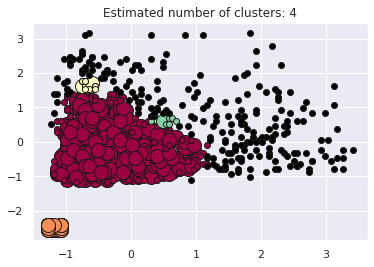

In [0]:
# Plot result
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
print('unique_labels',unique_labels)
print('colors',colors)

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

for k, col in zip(unique_labels, colors):
    print('k: ',k)
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k) # class separate based on k ,# core sample mask: all class
    
    #Plot 
    xy = X_scaled[class_member_mask & core_samples_mask] 
    print('xy1 (vong tron to): ',xy.shape)
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)
    #Plot 
    xy = X_scaled[class_member_mask & ~core_samples_mask]
    print('xy2 (vong tron nho): ',xy.shape)
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

## DBSCAN easy

Method 1

Number cluster:  4


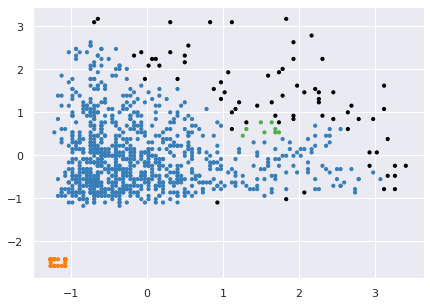

In [0]:
db = DBSCAN(eps=0.3, min_samples=10)
db.fit(X_scaled)

y_pred = db.labels_.astype(np.int)
print('Number cluster: ',len(set(y_pred)))

plt.subplots(figsize=(7,5)) #fix len dataset
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                          '#f781bf', '#a65628', '#984ea3',
                                          '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
# add black color for outliers (if any)
colors = np.append(colors, ["#000000"])
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], s=10, color=colors[y_pred])
plt.show()

### Method 2 Best

Number cluster:  4
{0, 1, 2, -1}
['#377eb8' '#ff7f00' '#4daf4a' '#000000']


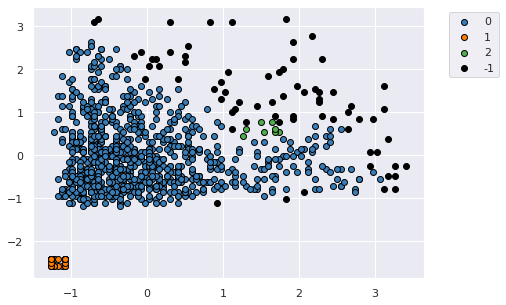

In [0]:
db = DBSCAN(eps=0.3, min_samples=10)
db.fit(X_scaled)

y_pred = db.labels_.astype(np.int)
clusters_number=len(set(y_pred))
print('Number cluster: ',clusters_number)

unique_labels = set(y_pred)
print(unique_labels)

colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                          '#f781bf', '#a65628', '#984ea3',
                                          '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
# add black color for outliers (if any)
colors = np.append(colors, ["#000000"])
print(colors)

i=0
fig,ax=plt.subplots(figsize=(7,5))

for k in unique_labels:
  plt.scatter(X_scaled[y_pred==k, 0],X_scaled[y_pred==k, 1], 
              edgecolor='black',marker='o',label=k,
              c=colors[i] # Note: depend on number of cluster (max 8), if infinitive cluster, need to remove colors
              )
  i+=1
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

Method 3 outlier is red

Number cluster:  4
{0, 1, 2, -1}


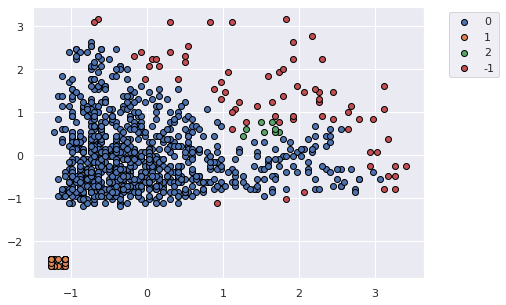

In [0]:
db = DBSCAN(eps=0.3, min_samples=10)
db.fit(X_scaled)

y_pred = db.labels_.astype(np.int)
clusters_number=len(set(y_pred))
print('Number cluster: ',clusters_number)

unique_labels = set(y_pred)
print(unique_labels)

fig,ax=plt.subplots(figsize=(7,5))

for k in unique_labels:
  plt.scatter(X_scaled[y_pred==k, 0],X_scaled[y_pred==k, 1], 
              edgecolor='black',marker='o',label=k,
              #c=colors[i]
              )
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

## GaussianMixture

In [0]:
file_url = 'https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter05/DataSet/german.data-numeric'
df = pd.read_csv(file_url, header=None, sep='\s\s+', prefix='X')
df.head()
X = df[['X3', 'X9']]
standard_scaler = StandardScaler()
X_scaled = standard_scaler.fit_transform(X)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.



Method 1

Number cluster:  5


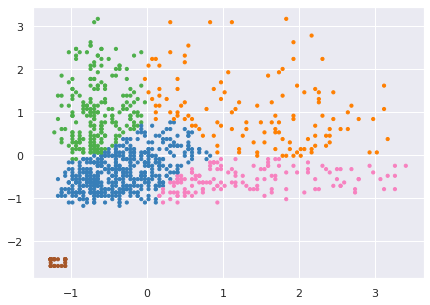

In [0]:
gmm = mixture.GaussianMixture(
    n_components=5, covariance_type='full')

gmm.fit(X_scaled)
y_pred = gmm.predict(X_scaled)
print('Number cluster: ',len(set(y_pred)))

plt.subplots(figsize=(7,5)) #fix len dataset
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                          '#f781bf', '#a65628', '#984ea3',
                                          '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
# add black color for outliers (if any)
colors = np.append(colors, ["#000000"])
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], s=10, color=colors[y_pred])
plt.show()

### Method 2 best (outlier is black)

Number cluster:  5
{0, 1, 2, 3, 4}
['#377eb8' '#ff7f00' '#4daf4a' '#f781bf' '#a65628' '#000000']


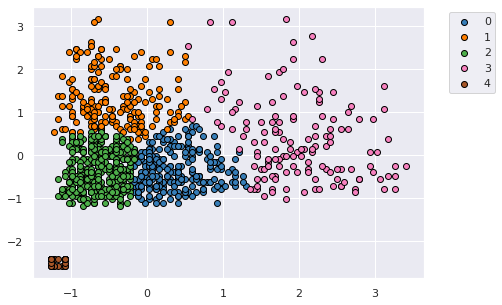

In [0]:
gmm = mixture.GaussianMixture(
    n_components=5, covariance_type='full')
gmm.fit(X_scaled)

y_pred = gmm.predict(X_scaled)

clusters_number=len(set(y_pred))
print('Number cluster: ',clusters_number)

unique_labels = set(y_pred)
print(unique_labels)

colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                          '#f781bf', '#a65628', '#984ea3',
                                          '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
# add black color for outliers (if any)
colors = np.append(colors, ["#000000"])
print(colors)
i=0

fig,ax=plt.subplots(figsize=(7,5))

for k in unique_labels:
  plt.scatter(X_scaled[y_pred==k, 0],X_scaled[y_pred==k, 1], 
              edgecolor='black',marker='o',label=k,
              c=colors[i] # Note: depend on number of cluster (max 8), if infinitive cluster, need to remove colors
              )
  i+=1
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

### Bayesian Gaussian Mixture (for outlier detect)

/usr/local/lib/python3.6/dist-packages/sklearn/mixture/_base.py:267: ConvergenceWarning:

Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

/usr/local/lib/python3.6/dist-packages/sklearn/mixture/_base.py:267: ConvergenceWarning:

Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.



Number cluster:  5
{0, 1, 2, 3, 4}
['#377eb8' '#ff7f00' '#4daf4a' '#f781bf' '#a65628' '#000000']


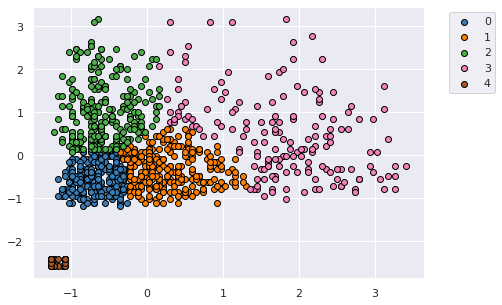

In [0]:
dpgmm = mixture.BayesianGaussianMixture(n_components=5,
                                        covariance_type='full').fit(X)
dpgmm.fit(X_scaled)

y_pred = dpgmm.predict(X_scaled)

clusters_number=len(set(y_pred))
print('Number cluster: ',clusters_number)

unique_labels = set(y_pred)
print(unique_labels)

colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                          '#f781bf', '#a65628', '#984ea3',
                                          '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
# add black color for outliers (if any)
colors = np.append(colors, ["#000000"])
print(colors)
i=0

fig,ax=plt.subplots(figsize=(7,5))

for k in unique_labels:
  plt.scatter(X_scaled[y_pred==k, 0],X_scaled[y_pred==k, 1], 
              edgecolor='black',marker='o',label=k,
              c=colors[i] # Note: depend on number of cluster (max 8), if infinitive cluster, need to remove colors
              )
  i+=1
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

### GMM Hands on

In [0]:
def plot_cluster(model):
  y_pred = gm.predict(X_scaled)

  clusters_number=len(set(y_pred))
  print('Number cluster: ',clusters_number)

  unique_labels = set(y_pred)
  print(unique_labels)

  colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                            '#f781bf', '#a65628', '#984ea3',
                                            '#999999', '#e41a1c', '#dede00']),
                                    int(max(y_pred) + 1))))
  # add black color for outliers (if any)
  colors = np.append(colors, ["#000000"])
  print(colors)
  i=0

  fig,ax=plt.subplots(figsize=(7,5))

  for k in unique_labels:
    plt.scatter(X_scaled[y_pred==k, 0],X_scaled[y_pred==k, 1], 
                edgecolor='black',marker='o',label=k,
                c=colors[i] # Note: depend on number of cluster (max 8), if infinitive cluster, need to remove colors
                )
    i+=1
  plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
  plt.show()

In [0]:
print(X_scaled.shape)

(1000, 2)


In [0]:
gm = GaussianMixture(n_components=5, n_init=10, random_state=42)
gm.fit(X_scaled)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=5, n_init=10,
                precisions_init=None, random_state=42, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

You can impose constraints on the covariance matrices that the algorithm looks for by setting the covariance_type hyperparameter:

"full" (default): no constraint, all clusters can take on any ellipsoidal shape of any size.

"tied": all clusters must have the same shape, which can be any ellipsoid (i.e., they all share the same covariance matrix).

"spherical": all clusters must be spherical, but they can have different diameters (i.e., different variances).

"diag": clusters can take on any ellipsoidal shape of any size, but the ellipsoid's axes must be parallel to the axes (i.e., the covariance matrices must be diagonal).

In [0]:
print(gm.weights_)
print(gm.means_)
print(gm.covariances_)
# Did the algorithm actually converge?
print(gm.converged_)
# Yes, good. How many iterations did it take?
print(gm.n_iter_)

[0.21634399 0.04099824 0.31255729 0.2823922  0.14770827]
[[-0.28580498  1.0546291 ]
 [-1.2127096  -2.45242809]
 [ 0.08770787 -0.45531556]
 [-0.69311611 -0.16931724]
 [ 1.8947349   0.42318991]]
[[[ 2.29252851e-01 -1.60585544e-01]
  [-1.60585544e-01  6.66444889e-01]]

 [[ 6.46458924e-03 -7.80385775e-04]
  [-7.80385775e-04  4.14285352e-03]]

 [[ 3.58406523e-01  3.90196554e-02]
  [ 3.90196554e-02  1.34397251e-01]]

 [[ 4.71057311e-02  4.82412594e-03]
  [ 4.82412594e-03  3.20450682e-01]]

 [[ 5.31472674e-01 -2.29369755e-01]
  [-2.29369755e-01  9.24779048e-01]]]
True
28


Now that you have an estimate of the location, size, shape, orientation, and relative
weight of each cluster, the model can easily assign each instance to the most likely
cluster (hard clustering) or estimate the probability that it belongs to a particular
cluster (soft clustering). Just use the predict() method for hard clustering, or the
predict_proba() method for soft clustering:

In [0]:
gm.predict(X_scaled)[:20]
gm.predict_proba(X_scaled)[:5]

array([[9.98246228e-01, 0.00000000e+00, 5.22413087e-16, 1.86548090e-04,
        1.56722353e-03],
       [3.91818828e-03, 0.00000000e+00, 2.32250619e-01, 5.66968072e-23,
        7.63831192e-01],
       [9.35602275e-01, 0.00000000e+00, 5.01660889e-05, 6.09886538e-02,
        3.35890547e-03],
       [2.65883777e-08, 0.00000000e+00, 7.21236837e-05, 1.87191221e-45,
        9.99927850e-01],
       [3.50506374e-02, 0.00000000e+00, 1.56222140e-05, 2.81525566e-14,
        9.64933740e-01]])

It is also possible to estimate the density of the model at any given location. This is
achieved using the score_samples() method: for each instance it is given, this method estimates the log of the probability density function (PDF) at that location.
The greater the score, the higher the density:

In [0]:
gm.score_samples(X_scaled)[:10]

array([-4.03562558, -4.57314957, -2.27772766, -3.89699591, -4.2872313 ,
       -4.55656077, -2.8609771 , -3.37522059, -4.29564633, -2.95431644])

In [0]:
from matplotlib.colors import LogNorm

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)
    
def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

In [0]:
gm_full = GaussianMixture(n_components=5, n_init=10, covariance_type="full", random_state=42)
gm_tied = GaussianMixture(n_components=5, n_init=10, covariance_type="tied", random_state=42)
gm_spherical = GaussianMixture(n_components=5, n_init=10, covariance_type="spherical", random_state=42)
gm_diag = GaussianMixture(n_components=5, n_init=10, covariance_type="diag", random_state=42)
gm_full.fit(X_scaled)
gm_tied.fit(X_scaled)
gm_spherical.fit(X_scaled)
gm_diag.fit(X_scaled)

GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=100,
                means_init=None, n_components=5, n_init=10,
                precisions_init=None, random_state=42, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

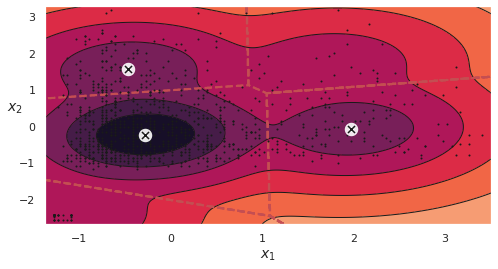

In [0]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm_tied, X_scaled)

#save_fig("gaussian_mixtures_plot")
plt.show()

Number cluster:  5
{0, 1, 2, 3, 4}
['#377eb8' '#ff7f00' '#4daf4a' '#f781bf' '#a65628' '#000000']


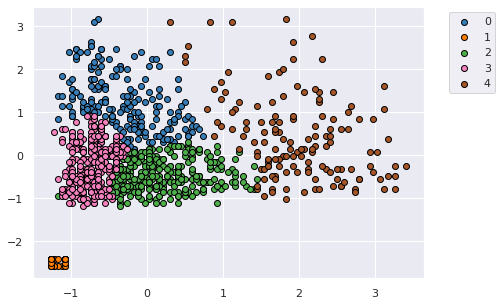

In [0]:
plot_cluster(gm)

## OPTICS (just reference)

Number cluster:  3
{0, 1, -1}
['#377eb8' '#ff7f00' '#000000']


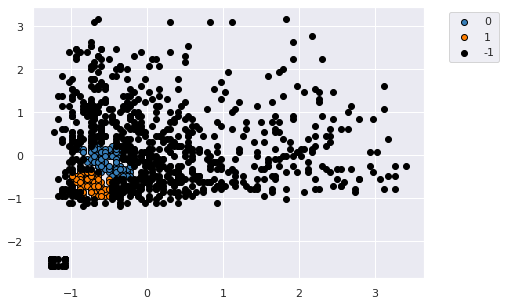

In [0]:
optics = cluster.OPTICS(min_samples=20,
                        xi=0.05,
                        min_cluster_size=0.1)
optics.fit(X_scaled)

y_pred = optics.labels_.astype(np.int)
clusters_number=len(set(y_pred))
print('Number cluster: ',clusters_number)

unique_labels = set(y_pred)
print(unique_labels)

colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                          '#f781bf', '#a65628', '#984ea3',
                                          '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
# add black color for outliers (if any)
colors = np.append(colors, ["#000000"])
print(colors)

i=0
fig,ax=plt.subplots(figsize=(7,5))

for k in unique_labels:
  plt.scatter(X_scaled[y_pred==k, 0],X_scaled[y_pred==k, 1], 
              edgecolor='black',marker='o',label=k,
              c=colors[i] # Note: depend on number of cluster (max 8), if infinitive cluster, need to remove colors
              )
  i+=1
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

## Compare all cluster method

### Method 1

In [0]:
file_url = 'https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter05/DataSet/german.data-numeric'
df = pd.read_csv(file_url, header=None, sep='\s\s+', prefix='X')
df.head()

X = df[['X3', 'X9']]
standard_scaler = StandardScaler()
X_scaled = standard_scaler.fit_transform(X)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.



MiniBatchKMeans (D)
Number cluster:  5
{0, 1, 2, 3, 4}


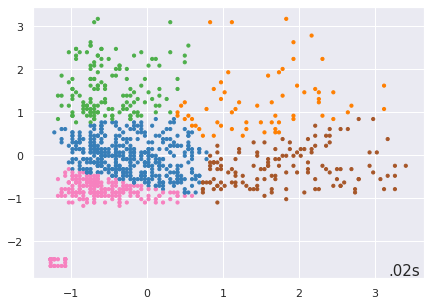

AffinityPropagation
Number cluster:  3
{0, 1, 2}


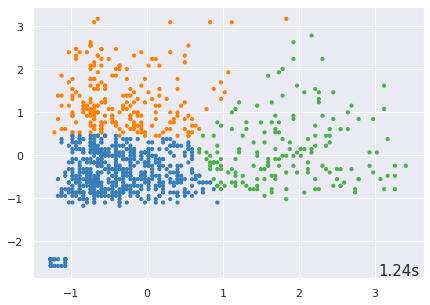

MeanShift
Number cluster:  2
{0, 1}


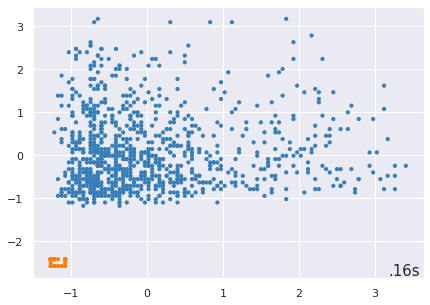

SpectralClustering (D)
Number cluster:  5
{0, 1, 2, 3, 4}


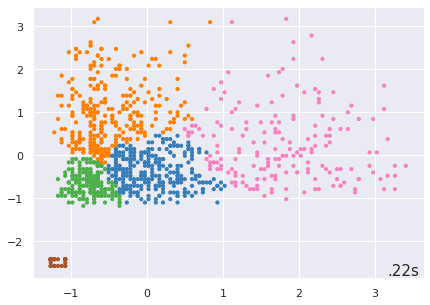

Agglomerative-ward (D)
Number cluster:  5
{0, 1, 2, 3, 4}


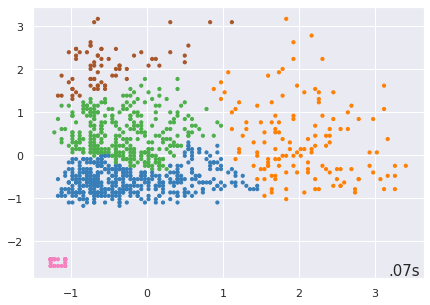

Agglomerative-average_linkage (D)
Number cluster:  5
{0, 1, 2, 3, 4}


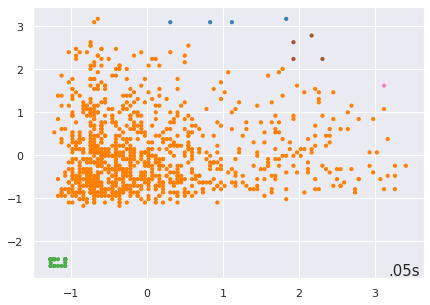

DBSCAN
Number cluster:  5
{0, 1, 2, 3, -1}


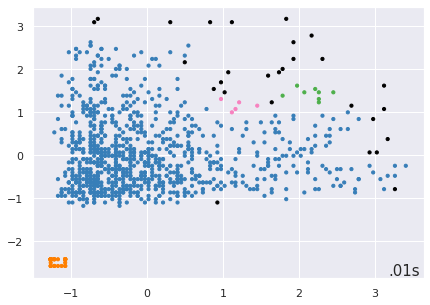

OPTICS
Number cluster:  3
{0, 1, -1}


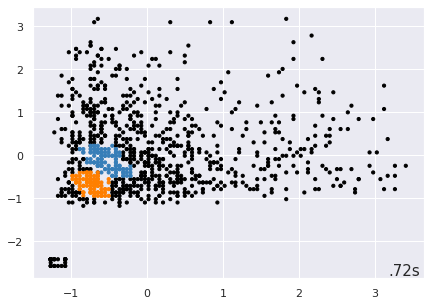

Birch (D)
Number cluster:  5
{0, 1, 2, 3, 4}


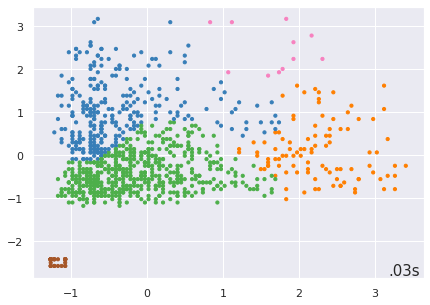

GaussianMixture (D)
Number cluster:  5
{0, 1, 2, 3, 4}


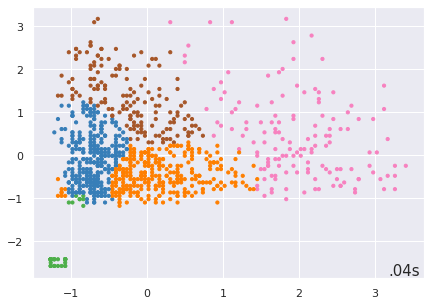

In [0]:
import time
import warnings

time_=[]
name_=[]
num_cluster=[]
# Default setting for clustering algorithm:
default_base = {'quantile': .3,     # Meanshift bandwith
                'eps': .3,          # Dbscan
                'damping': .9,      # Affinity_propagation 
                'preference': -200, # Affinity_propagation 
                'n_neighbors': 10,  # Agglomerative, average_linkage 
                'n_clusters': 5, # Two_means, Agglomerative, Spectral, Average_linkage, Birch, GaussianMixture
                'min_samples': 20,  # Optics
                'xi': 0.05,         # Optics 
                'min_cluster_size': 0.1 # Optics
                }

# update parameters with dataset-specific values
params = default_base.copy()

# estimate bandwidth for mean shift
bandwidth = cluster.estimate_bandwidth(X_scaled, quantile=params['quantile']) # Mean shift

# connectivity matrix for structured Ward
connectivity = kneighbors_graph(
    X_scaled, n_neighbors=params['n_neighbors'], include_self=False)
# make connectivity symmetric
connectivity = 0.5 * (connectivity + connectivity.T)

# ============
# Create cluster objects
# ============
ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)

two_means = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])

ward = cluster.AgglomerativeClustering(
    n_clusters=params['n_clusters'], linkage='ward',
    connectivity=connectivity)

average_linkage = cluster.AgglomerativeClustering(
    linkage="average", affinity="cityblock",
    n_clusters=params['n_clusters'], connectivity=connectivity)

spectral = cluster.SpectralClustering(
    n_clusters=params['n_clusters'], eigen_solver='arpack',
    affinity="nearest_neighbors")

dbscan = cluster.DBSCAN(eps=params['eps'])

optics = cluster.OPTICS(min_samples=params['min_samples'],
                        xi=params['xi'],
                        min_cluster_size=params['min_cluster_size'])

affinity_propagation = cluster.AffinityPropagation(
    damping=params['damping'], preference=params['preference'])

birch = cluster.Birch(n_clusters=params['n_clusters'])

gmm = mixture.GaussianMixture(
    n_components=params['n_clusters'], covariance_type='full')

clustering_algorithms = (
    ('MiniBatchKMeans (D)', two_means), #must define n_cluster
    ('AffinityPropagation', affinity_propagation), #no define cluster
    ('MeanShift', ms), #no define cluster
    ('SpectralClustering (D)', spectral), #must define n_cluster
    ('Agglomerative-ward (D)', ward), #must define n_cluster
    ('Agglomerative-average_linkage (D)', average_linkage), #must define n_cluster
    ('DBSCAN', dbscan), # Detect outlier #no define cluster
    ('OPTICS', optics), # Detect outlier #no define cluster
    ('Birch (D)', birch), #must define n_cluster
    ('GaussianMixture (D)', gmm) #must define n_cluster
)

for name, algorithm in clustering_algorithms:
    t0 = time.time()
    print(name)
    name_.append(name)
    # catch warnings related to kneighbors_graph
    with warnings.catch_warnings():
        warnings.filterwarnings(
            "ignore",
            message="the number of connected components of the " +
            "connectivity matrix is [0-9]{1,2}" +
            " > 1. Completing it to avoid stopping the tree early.",
            category=UserWarning)
        warnings.filterwarnings(
            "ignore",
            message="Graph is not fully connected, spectral embedding" +
            " may not work as expected.",
            category=UserWarning)
        algorithm.fit(X_scaled)

    t1 = time.time()
    if hasattr(algorithm, 'labels_'):
        y_pred = algorithm.labels_.astype(np.int)
    else:
        y_pred = algorithm.predict(X_scaled)

    print('Number cluster: ',len(set(y_pred)))
    print(set(y_pred))
    num_cluster.append(len(set(y_pred)))

    plt.subplots(figsize=(7,5)) #fix len dataset

    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                          '#f781bf', '#a65628', '#984ea3',
                                          '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
    # add black color for outliers (if any)
    colors = np.append(colors, ["#000000"])
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], s=10, color=colors[y_pred])

    #plt.xlim(-2.5, 2.5)
    #plt.ylim(-2.5, 2.5)
    #plt.xticks(())
    #plt.yticks(())
    plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
              transform=plt.gca().transAxes, size=15,
              horizontalalignment='right')
    #plot_num += 1
    #plt.legend(color)
    time_.append(t1-t0)
    plt.show()



In [0]:
pd.DataFrame(zip(name_,num_cluster,time_),columns=['Algorithm cluster','Num_cluster','Time']).sort_values(by='Time',ascending='False')

Algorithm cluster  Num_cluster      Time
6                             DBSCAN            5  0.012036
0                MiniBatchKMeans (D)            5  0.019322
8                          Birch (D)            5  0.029395
9                GaussianMixture (D)            5  0.040456
5  Agglomerative-average_linkage (D)            5  0.052883
4             Agglomerative-ward (D)            5  0.065490
2                          MeanShift            2  0.158108
3             SpectralClustering (D)            5  0.215847
7                             OPTICS            3  0.716339
1                AffinityPropagation            3  1.238724

### Method 2

MiniBatchKMeans (D)
Number cluster:  5
{0, 1, 2, 3, 4}


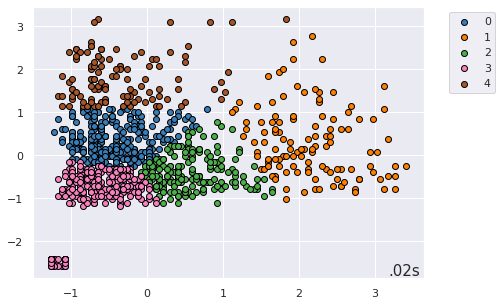

AffinityPropagation
Number cluster:  3
{0, 1, 2}


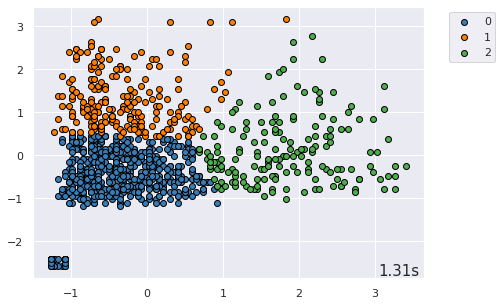

MeanShift
Number cluster:  2
{0, 1}


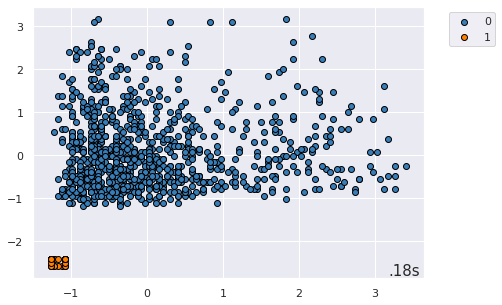

SpectralClustering (D)
Number cluster:  5
{0, 1, 2, 3, 4}


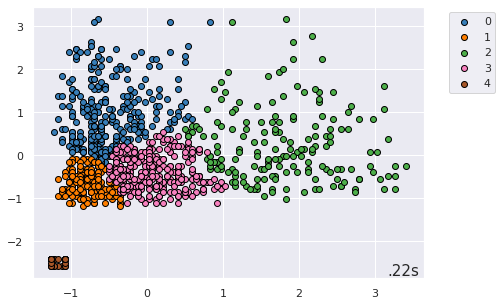

Agglomerative-ward (D)
Number cluster:  5
{0, 1, 2, 3, 4}


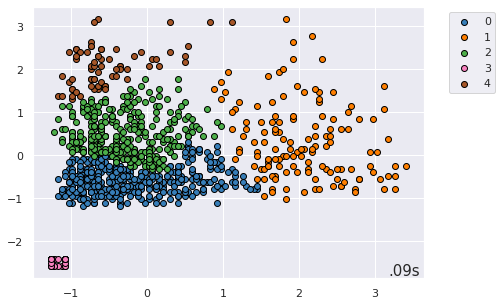

Agglomerative-average_linkage (D)
Number cluster:  5
{0, 1, 2, 3, 4}


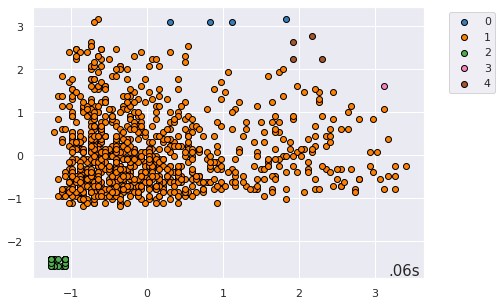

DBSCAN
Number cluster:  5
{0, 1, 2, 3, -1}


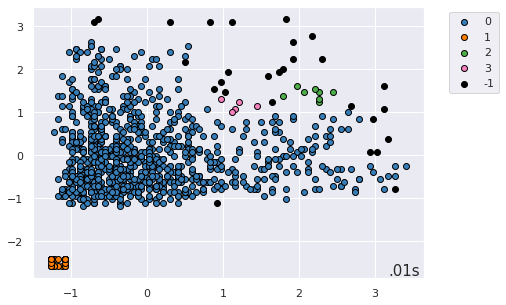

OPTICS
Number cluster:  3
{0, 1, -1}


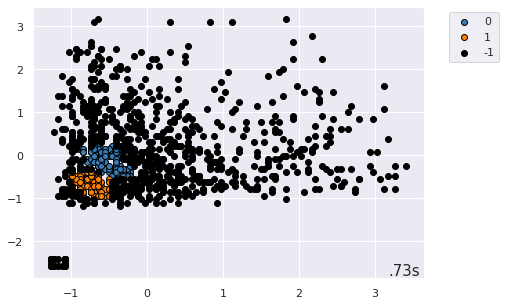

Birch (D)
Number cluster:  5
{0, 1, 2, 3, 4}


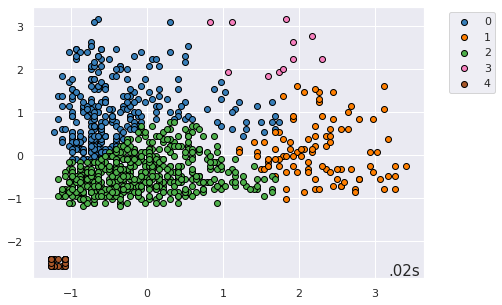

GaussianMixture (D)
Number cluster:  5
{0, 1, 2, 3, 4}


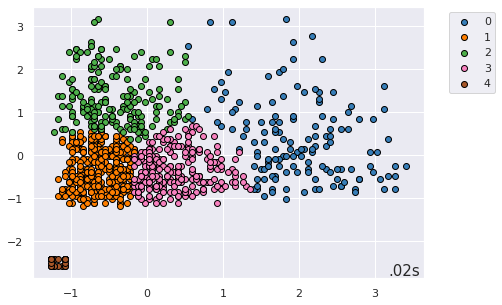

In [0]:
import time
import warnings

time_=[]
name_=[]
num_cluster=[]
# Default setting for clustering algorithm:
default_base = {'quantile': .3,     # Meanshift bandwith
                'eps': .3,          # Dbscan
                'damping': .9,      # Affinity_propagation 
                'preference': -200, # Affinity_propagation 
                'n_neighbors': 10,  # Agglomerative, average_linkage 
                'n_clusters': 5, # Two_means, Agglomerative, Spectral, Average_linkage, Birch, GaussianMixture
                'min_samples': 20,  # Optics
                'xi': 0.05,         # Optics 
                'min_cluster_size': 0.1 # Optics
                }

# update parameters with dataset-specific values
params = default_base.copy()

# estimate bandwidth for mean shift
bandwidth = cluster.estimate_bandwidth(X_scaled, quantile=params['quantile']) # Mean shift

# connectivity matrix for structured Ward
connectivity = kneighbors_graph(
    X_scaled, n_neighbors=params['n_neighbors'], include_self=False)
# make connectivity symmetric
connectivity = 0.5 * (connectivity + connectivity.T)

# ============
# Create cluster objects
# ============
ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)

two_means = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])

ward = cluster.AgglomerativeClustering(
    n_clusters=params['n_clusters'], linkage='ward',
    connectivity=connectivity)

average_linkage = cluster.AgglomerativeClustering(
    linkage="average", affinity="cityblock",
    n_clusters=params['n_clusters'], connectivity=connectivity)

spectral = cluster.SpectralClustering(
    n_clusters=params['n_clusters'], eigen_solver='arpack',
    affinity="nearest_neighbors")

dbscan = cluster.DBSCAN(eps=params['eps'])

optics = cluster.OPTICS(min_samples=params['min_samples'],
                        xi=params['xi'],
                        min_cluster_size=params['min_cluster_size'])

affinity_propagation = cluster.AffinityPropagation(
    damping=params['damping'], preference=params['preference'])

birch = cluster.Birch(n_clusters=params['n_clusters'])

gmm = mixture.GaussianMixture(
    n_components=params['n_clusters'], covariance_type='full')

clustering_algorithms = (
    ('MiniBatchKMeans (D)', two_means),
    ('AffinityPropagation', affinity_propagation),
    ('MeanShift', ms),
    ('SpectralClustering (D)', spectral),
    ('Agglomerative-ward (D)', ward),
    ('Agglomerative-average_linkage (D)', average_linkage),
    ('DBSCAN', dbscan),
    ('OPTICS', optics),
    ('Birch (D)', birch),
    ('GaussianMixture (D)', gmm)
)

for name, algorithm in clustering_algorithms:
    t0 = time.time()
    print(name)
    name_.append(name)
    # catch warnings related to kneighbors_graph
    with warnings.catch_warnings():
        warnings.filterwarnings(
            "ignore",
            message="the number of connected components of the " +
            "connectivity matrix is [0-9]{1,2}" +
            " > 1. Completing it to avoid stopping the tree early.",
            category=UserWarning)
        warnings.filterwarnings(
            "ignore",
            message="Graph is not fully connected, spectral embedding" +
            " may not work as expected.",
            category=UserWarning)
        algorithm.fit(X_scaled)

    t1 = time.time()
    if hasattr(algorithm, 'labels_'):
        y_pred = algorithm.labels_.astype(np.int)
    else:
        y_pred = algorithm.predict(X_scaled)

    
    #---------------DNN add-----------------------

    clusters_number=len(set(y_pred))
    print('Number cluster: ',clusters_number)
    print(set(y_pred))
    num_cluster.append(clusters_number)

    unique_labels = set(y_pred)
  
    #print(unique_labels)
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                          '#f781bf', '#a65628', '#984ea3',
                                          '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
    # add black color for outliers (if any)
    colors = np.append(colors, ["#000000"])
    i=0
    fig,ax=plt.subplots(figsize=(7,5))

    for k in unique_labels:
      plt.scatter(X_scaled[y_pred==k, 0],X_scaled[y_pred==k, 1], 
                  edgecolor='black',marker='o',label=k,
                  c=colors[i] # Note: depend on number of cluster, if infinitive cluster, need to remove colors
                  )
      i+=1
      
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

    plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
              transform=plt.gca().transAxes, size=15,
              horizontalalignment='right')
    #plot_num += 1
    #plt.legend(color)
    time_.append(t1-t0)
    plt.show()



# PCA and clustering Best method (K Mean)

In [0]:
file_url = 'https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter05/DataSet/german.data-numeric'
df = pd.read_csv(file_url, header=None, sep='\s\s+', prefix='X')
df.head()
#X = df[['X3', 'X9']]
#standard_scaler = StandardScaler()
#X_scaled = standard_scaler.fit_transform(X)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.



X0  X1 X2  X3  X4  X5  X6  X7  ...  X17  X18  X19  X20  X21  X22  X23  X24
0   1   6  4  12   5   5   3   4  ...    1    0    0    1    0    0    1  1.0
1   2  48  2  60   1   3   2   2  ...    1    0    0    1    0    0    1  2.0
2   4  12  4  21   1   4   3   3  ...    1    0    0    1    0    1    0  1.0
3   1  42  2  79   1   4   3   4  ...    0    0    0    0    0    0    1  1.0
4   1  24  3  49   1   3   3   4  ...    1    0    0    0    0    0    1  2.0

[5 rows x 25 columns]

In [0]:
df.dtypes

X0       int64
X1       int64
X2      object
X3       int64
X4       int64
X5       int64
X6       int64
X7       int64
X8       int64
X9       int64
X10      int64
X11      int64
X12      int64
X13      int64
X14      int64
X15      int64
X16      int64
X17      int64
X18      int64
X19      int64
X20      int64
X21      int64
X22      int64
X23      int64
X24    float64
dtype: object

In [0]:
X=df.select_dtypes(include=['float64','int64'])
X.isnull().sum()

X0      0
X1      0
X3      0
X4      0
X5      0
X6      0
X7      0
X8      0
X9      0
X10     0
X11     0
X12     0
X13     0
X14     0
X15     0
X16     0
X17     0
X18     0
X19     0
X20     0
X21     0
X22     0
X23     0
X24    41
dtype: int64

In [0]:
X.dropna(inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [0]:
standard_scaler = StandardScaler()
X_scaled = standard_scaler.fit_transform(X)
X_scaled

array([[-1.25435442, -1.25199741, -0.80888337, ..., -0.50845864,
         0.74959272, -0.63407159],
       [-0.46191312,  2.48506734,  1.51189196, ..., -0.50845864,
         0.74959272,  1.57710898],
       [ 1.12296947, -0.71813102, -0.373738  , ...,  1.96672833,
        -1.33405777, -0.63407159],
       ...,
       [ 1.12296947, -0.71813102, -1.00228132, ..., -0.50845864,
         0.74959272, -0.63407159],
       [-1.25435442,  2.21813414, -0.51878646, ..., -0.50845864,
         0.74959272,  1.57710898],
       [-0.46191312,  2.21813414,  0.83499915, ..., -0.50845864,
         0.74959272, -0.63407159]])

In [0]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
#pca = PCA(0.99) # Create a PCA that will retain 99% of the variance
X_train_pca = pca.fit_transform(X_scaled)
print(X.shape)
print(X_train_pca.shape)

(959, 24)
(959, 5)


In [0]:
from sklearn.cluster import KMeans

#k_range = range(5, 150, 5)
k_range = range(2,15)
kmeans_per_k = []
for k in k_range:
    #print("k={}".format(k))
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_train_pca)
    kmeans_per_k.append(kmeans)

In [0]:
kmeans_per_k[5].labels_[:30]

array([3, 0, 2, 5, 5, 5, 3, 5, 2, 0, 4, 4, 6, 2, 4, 2, 3, 0, 3, 3, 4, 2,
       3, 6, 2, 2, 4, 6, 5, 6], dtype=int32)

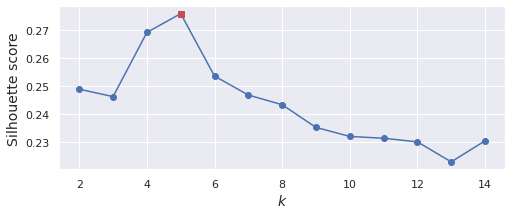

In [0]:
from sklearn.metrics import silhouette_score
silhouette_scores = [silhouette_score(X_train_pca, model.labels_)
                     for model in kmeans_per_k]
best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]

plt.figure(figsize=(8, 3))
plt.plot(k_range, silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.plot(best_k, best_score, "rs")
plt.show()

In [0]:
best_model = kmeans_per_k[best_index]
best_model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [0]:
best_k

5

Inetria below just for reference only (illustrate best model and best index from silhoute above)

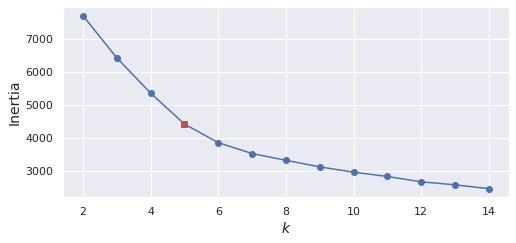

In [0]:
inertias = [model.inertia_ for model in kmeans_per_k]
best_inertia = inertias[best_index]

plt.figure(figsize=(8, 3.5))
plt.plot(k_range, inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.plot(best_k, best_inertia, "rs")
plt.show()

The optimal number of clusters is not clear on this inertia diagram, as there is no obvious elbow, so let's stick with k=120.

In [0]:
best_model = kmeans_per_k[best_index]
best_model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

{0, 1, 2, 3, 4}
[(0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0), (0.9748558246828143, 0.5574009996155325, 0.32272202998846594, 1.0), (0.998077662437524, 0.9992310649750096, 0.7460207612456747, 1.0), (0.5273356401384084, 0.8106113033448674, 0.6452133794694349, 1.0), (0.3686274509803922, 0.30980392156862746, 0.6352941176470588, 1.0)]


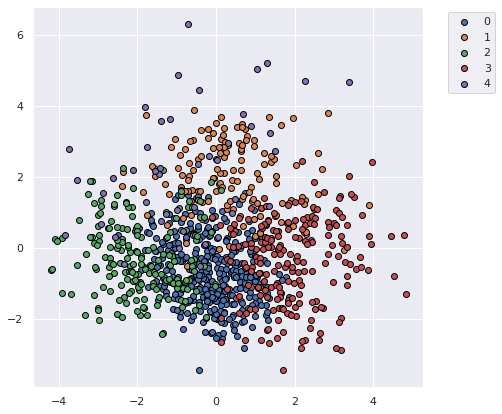

In [0]:
#ac.fit(X_scaled)
clusters_number=best_k
cluster=best_model.predict(X_train_pca)

unique_labels = set(cluster)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
print(unique_labels)
print(colors)

fig,ax=plt.subplots(figsize=(7,7))
for k in range(clusters_number):
  plt.scatter(X_train_pca[cluster==k, 0],X_train_pca[cluster==k, 1], 
              edgecolor='black',marker='o',label=k)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

# Python ML 3

In [0]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=150, 
                  n_features=2, 
                  centers=3, 
                  cluster_std=0.5, 
                  shuffle=True, 
                  random_state=0)

In [0]:
X[:5]

array([[2.60509732, 1.22529553],
       [0.5323772 , 3.31338909],
       [0.802314  , 4.38196181],
       [0.5285368 , 4.49723858],
       [2.61858548, 0.35769791]])

In [0]:
y[:5]

array([1, 0, 0, 0, 1])

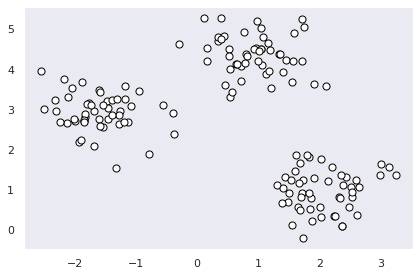

In [0]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], 
            c='white', marker='o', edgecolor='black', s=50)
plt.grid()
plt.tight_layout()
#plt.savefig('images/11_01.png', dpi=300)
plt.show()

In [0]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, 
            init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(X)
y_km

array([2, 1, 1, 1, 2, 1, 1, 2, 0, 1, 2, 0, 0, 1, 1, 0, 0, 2, 0, 2, 1, 2,
       1, 1, 0, 2, 2, 1, 0, 2, 0, 0, 0, 0, 1, 2, 2, 2, 1, 1, 0, 0, 1, 2,
       2, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2, 0, 1, 2, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 0, 0, 1, 2, 2, 1, 1, 2, 2, 2, 0,
       0, 2, 2, 1, 2, 1, 2, 1, 0, 0, 2, 2, 2, 2, 0, 2, 2, 1, 0, 1, 1, 1,
       0, 1, 2, 0, 1, 0, 1, 1, 0, 0, 1, 2, 1, 1, 2, 2, 0, 2, 0, 0, 0, 0,
       2, 0, 0, 0, 1, 0, 2, 0, 1, 1, 2, 2, 0, 0, 0, 0, 2, 2], dtype=int32)

In [0]:
km.cluster_centers_

array([[-1.5947298 ,  2.92236966],
       [ 0.9329651 ,  4.35420712],
       [ 2.06521743,  0.96137409]])

In [0]:
y_km == 0, 0

(array([False, False, False, False, False, False, False, False,  True,
        False, False,  True,  True, False, False,  True,  True, False,
         True, False, False, False, False, False,  True, False, False,
        False,  True, False,  True,  True,  True,  True, False, False,
        False, False, False, False,  True,  True, False, False, False,
        False,  True, False,  True, False, False, False, False, False,
        False,  True, False, False,  True, False,  True,  True,  True,
         True, False,  True, False, False, False, False, False, False,
        False, False, False, False, False,  True,  True, False, False,
        False, False, False, False, False, False,  True,  True, False,
        False, False, False, False, False, False,  True,  True, False,
        False, False, False,  True, False, False, False,  True, False,
        False, False,  True, False, False,  True, False,  True, False,
        False,  True,  True, False, False, False, False, False, False,
      

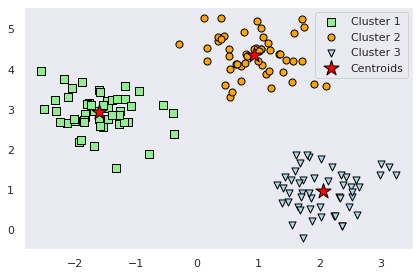

In [0]:
plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='Cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='Cluster 2')
plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='Cluster 3')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='Centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
#plt.savefig('images/11_02.png', dpi=300)
plt.show()

## Using the elbow method to find the optimal number of clusters K Means

In [0]:
print('Distortion: %.2f' % km.inertia_)

Distortion: 72.48


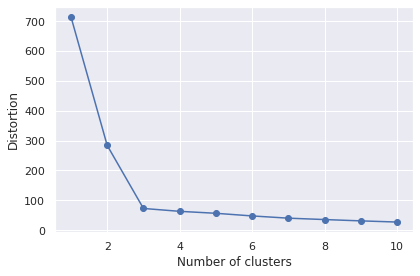

In [0]:

distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
#plt.savefig('images/11_03.png', dpi=300)
plt.show()

As you can see in the following plot, the elbow is located at k = 3, so this is evidence
that k = 3 is indeed a good choice for this dataset:

## Explain by Sklearn silhousette

For n_clusters = 2 The average silhouette_score is : 0.5848706144251782
For n_clusters = 3 The average silhouette_score is : 0.7143417887288687
For n_clusters = 4 The average silhouette_score is : 0.5768508858868746
For n_clusters = 5 The average silhouette_score is : 0.4465834472644722
For n_clusters = 6 The average silhouette_score is : 0.31753117419680627


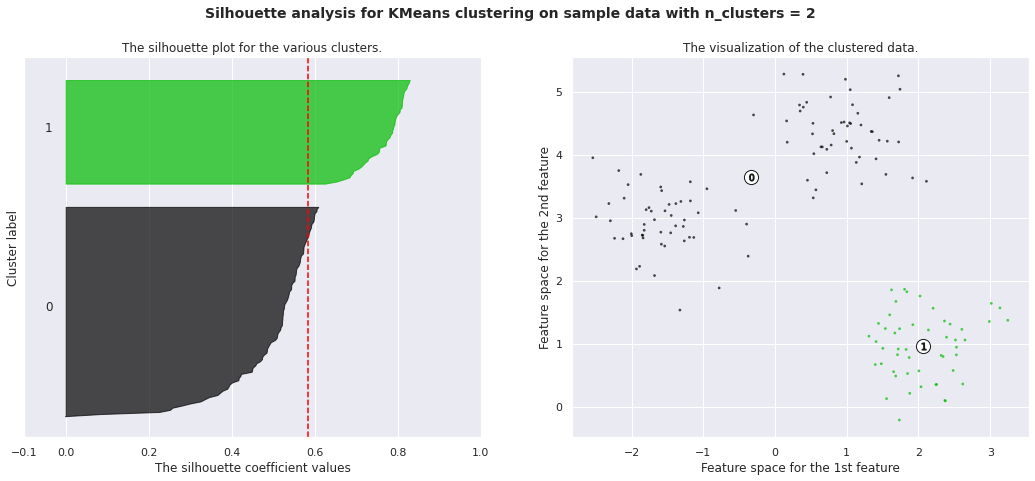

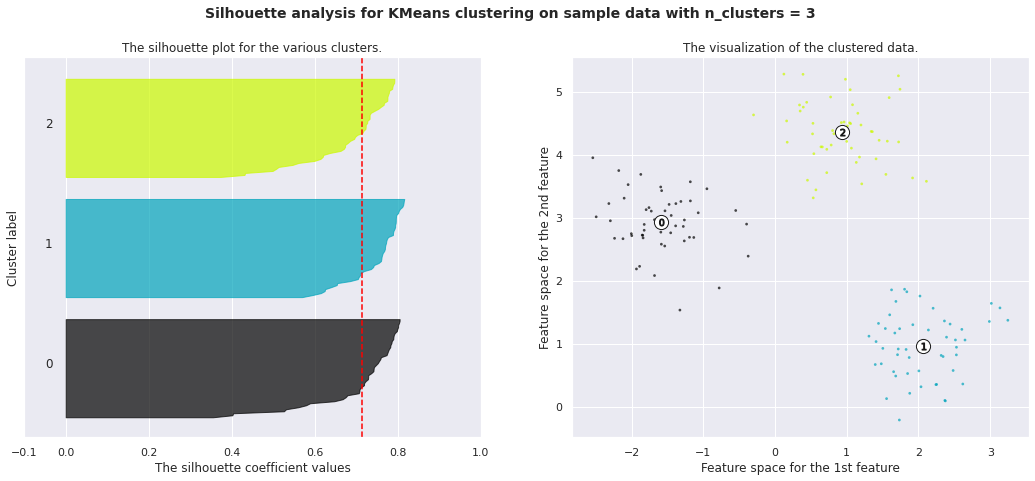

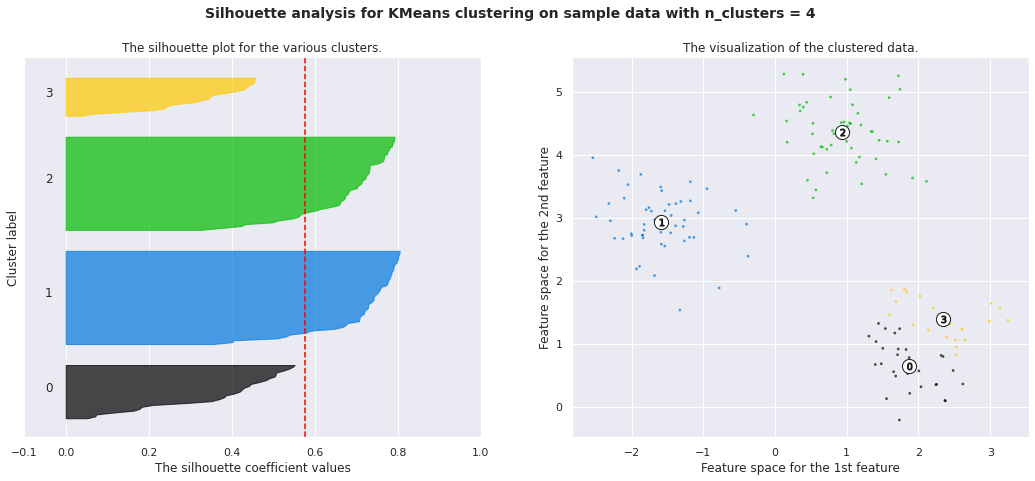

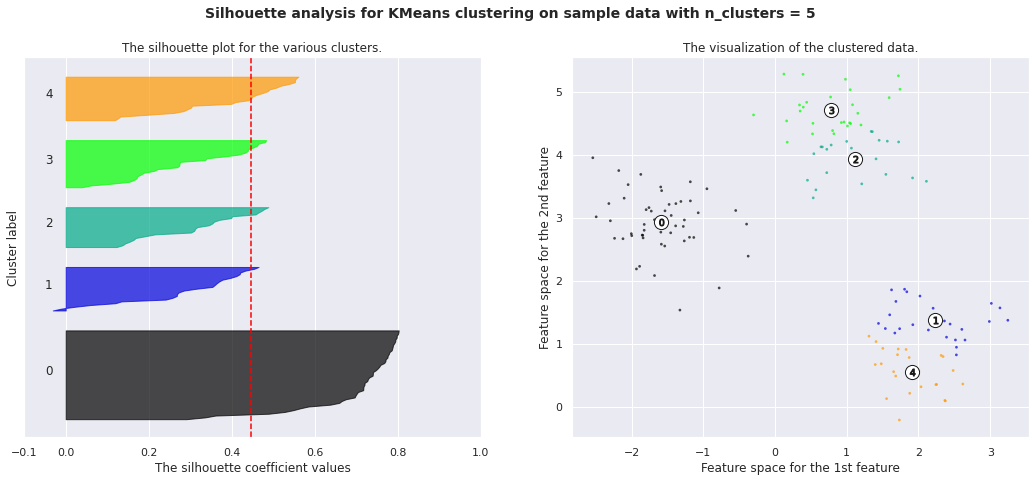

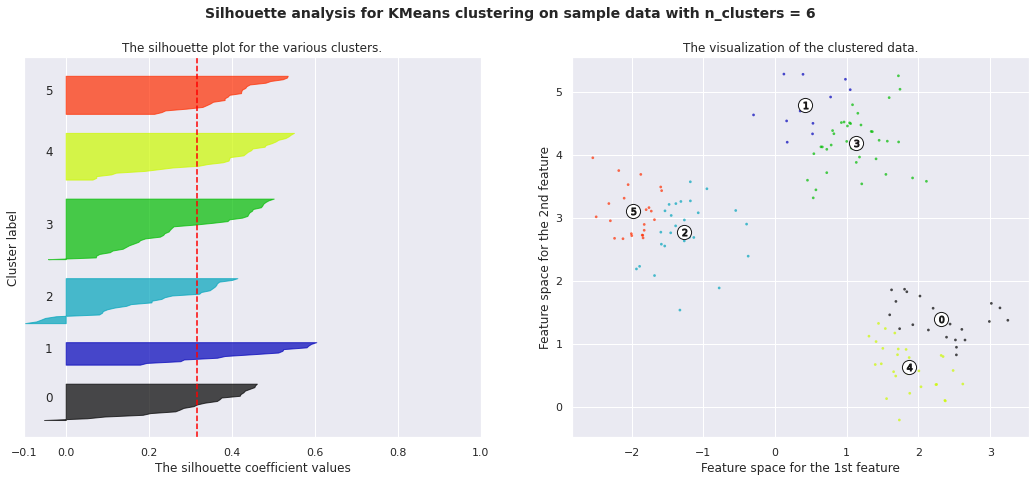

In [0]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

## Quantifying the quality of clustering via silhouette plots

Another intrinsic metric to evaluate the quality of a clustering is silhouette analysis,
which can also be applied to clustering algorithms other than k-means, which we
will discuss later in this chapter. Silhouette analysis can be used as a graphical tool to
plot a measure of how tightly grouped the examples in the clusters are. To calculate
the silhouette coefficient of a single example in our dataset, we can apply the
following three steps:

1. Calculate the cluster cohesion, 𝑎𝑎(𝑖𝑖), as the average distance between
an example, 𝒙𝒙(𝑖𝑖), and all other points in the same cluster.

2. Calculate the cluster separation, 𝑏𝑏(𝑖𝑖), from the next closest cluster as the
average distance between the example, 𝒙𝒙(𝑖𝑖), and all examples in the nearest
cluster.

3. Calculate the silhouette, 𝑠𝑠(𝑖𝑖), as the difference between cluster cohesion and
separation divided by the greater of the two, as shown here:

The silhouette coefficient is bounded in the range –1 to 1. Based on the preceding
equation, we can see that the silhouette coefficient is 0 if the cluster separation and
cohesion are equal (𝑏𝑏(𝑖𝑖) = 𝑎𝑎(𝑖𝑖)). Furthermore, we get close to an ideal silhouette
coefficient of 1 if 𝑏𝑏(𝑖𝑖) ≫ 𝑎𝑎(𝑖𝑖), since 𝑏𝑏(𝑖𝑖) quantifies how dissimilar an example is
from other clusters, and 𝑎𝑎(𝑖𝑖) tells us how similar it is to the other examples in
its own cluster.

In [0]:

import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples, silhouette_score

km = KMeans(n_clusters=3, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)
print(y_km.shape)
y_km

(150,)


array([1, 2, 2, 2, 1, 2, 2, 1, 0, 2, 1, 0, 0, 2, 2, 0, 0, 1, 0, 1, 2, 1,
       2, 2, 0, 1, 1, 2, 0, 1, 0, 0, 0, 0, 2, 1, 1, 1, 2, 2, 0, 0, 2, 1,
       1, 1, 0, 2, 0, 2, 1, 2, 2, 1, 1, 0, 2, 1, 0, 2, 0, 0, 0, 0, 2, 0,
       2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 0, 0, 2, 1, 1, 2, 2, 1, 1, 1, 0,
       0, 1, 1, 2, 1, 2, 1, 2, 0, 0, 1, 1, 1, 1, 0, 1, 1, 2, 0, 2, 2, 2,
       0, 2, 1, 0, 2, 0, 2, 2, 0, 0, 2, 1, 2, 2, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 2, 0, 1, 0, 2, 2, 1, 1, 0, 0, 0, 0, 1, 1], dtype=int32)

In [0]:
X[:5]

array([[2.60509732, 1.22529553],
       [0.5323772 , 3.31338909],
       [0.802314  , 4.38196181],
       [0.5285368 , 4.49723858],
       [2.61858548, 0.35769791]])

In [0]:
cluster_labels = np.unique(y_km)
cluster_labels

array([0, 1, 2], dtype=int32)

In [0]:
n_clusters = cluster_labels.shape[0]
n_clusters

3

Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].

Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

Code belwo just for explain only

In [0]:
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
silhouette_vals[:10]

array([0.75956181, 0.43233677, 0.7747553 , 0.72286402, 0.76729229,
       0.72280273, 0.69484791, 0.76101499, 0.77303671, 0.67320272])

In [0]:
silhouette_vals.shape

(150,)

In [0]:
c=1
y_km == c

array([ True, False, False, False,  True, False, False,  True, False,
       False,  True, False, False, False, False, False, False,  True,
       False,  True, False,  True, False, False, False,  True,  True,
       False, False,  True, False, False, False, False, False,  True,
        True,  True, False, False, False, False, False,  True,  True,
        True, False, False, False, False,  True, False, False,  True,
        True, False, False,  True, False, False, False, False, False,
       False, False, False, False,  True, False, False, False,  True,
        True, False,  True, False, False, False, False, False,  True,
        True, False, False,  True,  True,  True, False, False,  True,
        True, False,  True, False,  True, False, False, False,  True,
        True,  True,  True, False,  True,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False,  True, False, False,  True,  True,
       False,  True,

i, c : 0 0
c_silhouette_vals.shape:  (50,)
c_silhouette_vals: 
 [0.35466307 0.40154174 0.40348569 0.5257976  0.53081359 0.56028722
 0.57912988 0.58878683 0.64697003 0.66709398 0.67446502 0.67874476
 0.7061704  0.707709   0.70806176 0.7116979  0.71866965 0.71886096
 0.72242176 0.72821908 0.72878986 0.72889549 0.73611334 0.74135332
 0.74183186 0.74253797 0.74715119 0.75189627 0.75476664 0.75791717
 0.75955598 0.77303671 0.77492826 0.77665128 0.77872478 0.78189854
 0.78239431 0.78474349 0.78561661 0.78917529 0.78954087 0.79045011
 0.79274343 0.79779972 0.79897477 0.800814   0.80092777 0.80287718
 0.80440263 0.8045906 ]
y_ax_upper 50
y_ax_lower 50
i, c : 1 1
c_silhouette_vals.shape:  (50,)
c_silhouette_vals: 
 [0.56967556 0.59401827 0.61479508 0.62375802 0.62515462 0.6397918
 0.65285806 0.65437536 0.68519649 0.70372273 0.70584253 0.70953106
 0.70994165 0.71872541 0.73534283 0.74071059 0.7425489  0.75363719
 0.75956181 0.76045682 0.76101499 0.76230562 0.76384238 0.76729229
 0.76899613 0.769

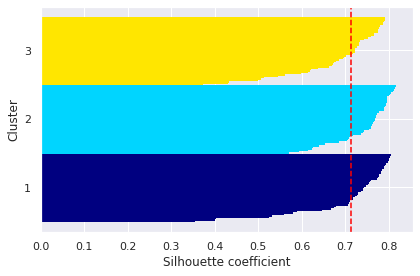

In [0]:
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):

  #Split silhouette_vals in three cluster gropp (show only value that y_km=c)
  # silhouette_vals: euclidean distance from df(x,y) to assigned cluster
  print('i, c :',i,c)
  c_silhouette_vals = silhouette_vals[y_km == c]
  c_silhouette_vals.sort()
  #silhouette_avg = silhouette_score[y_km == c]

  print('c_silhouette_vals.shape: ',c_silhouette_vals.shape)
  print('c_silhouette_vals: \n',c_silhouette_vals)
  #print('silhouette_avg: \n',silhouette_avg)
  y_ax_upper += len(c_silhouette_vals)
  print('y_ax_upper',y_ax_upper)

  #plot-----------------
  color = cm.jet(float(i) / n_clusters)
  plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)
  #-----------------------

  yticks.append((y_ax_lower + y_ax_upper) / 2.)
  y_ax_lower += len(c_silhouette_vals)
  print('y_ax_lower',y_ax_lower)
  
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
#plt.savefig('images/11_04.png', dpi=300)
plt.show()

## Organizing clusters as a hierarchical tree

In this section, we will take a look at an alternative approach to prototype-based
clustering: hierarchical clustering. One advantage of the hierarchical clustering
algorithm is that it allows us to plot dendrograms (visualizations of a binary
hierarchical clustering), which can help with the interpretation of the results by
creating meaningful taxonomies. Another advantage of this hierarchical approach
is that we do not need to specify the number of clusters upfront.

The two main approaches to hierarchical clustering are agglomerative and divisive
hierarchical clustering. In divisive hierarchical clustering, we start with one cluster
that encompasses the complete dataset, and we iteratively split the cluster into
smaller clusters until each cluster only contains one example. In this section, we will
focus on agglomerative clustering, which takes the opposite approach. We start with
each example as an individual cluster and merge the closest pairs of clusters until
only one cluster remains.

In this section, we will focus on agglomerative clustering using the complete linkage
approach. Hierarchical complete linkage clustering is an iterative procedure that can
be summarized by the following steps:
1. Compute the distance matrix of all examples.
2. Represent each data point as a singleton cluster.
3. Merge the two closest clusters based on the distance between the most
dissimilar (distant) members.
4. Update the similarity matrix.
5. Repeat steps 2-4 until one single cluster remains.

In [0]:

import pandas as pd
import numpy as np

np.random.seed(123)

variables = ['X', 'Y', 'Z']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']

X = np.random.random_sample([5, 3])*10
df = pd.DataFrame(X, columns=variables, index=labels)
df

X         Y         Z
ID_0  6.964692  2.861393  2.268515
ID_1  5.513148  7.194690  4.231065
ID_2  9.807642  6.848297  4.809319
ID_3  3.921175  3.431780  7.290497
ID_4  4.385722  0.596779  3.980443

In [0]:
from scipy.spatial.distance import pdist, squareform

row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')),
                        columns=labels,
                        index=labels)
row_dist

ID_0      ID_1      ID_2      ID_3      ID_4
ID_0  0.000000  4.973534  5.516653  5.899885  3.835396
ID_1  4.973534  0.000000  4.347073  5.104311  6.698233
ID_2  5.516653  4.347073  0.000000  7.244262  8.316594
ID_3  5.899885  5.104311  7.244262  0.000000  4.382864
ID_4  3.835396  6.698233  8.316594  4.382864  0.000000

In [0]:
# 1. incorrect approach: Squareform distance matrix

from scipy.cluster.hierarchy import linkage

row_clusters = linkage(row_dist, method='complete', metric='euclidean')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1)
                    for i in range(row_clusters.shape[0])])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



row label 1  row label 2   distance  no. of items in clust.
cluster 1          0.0          4.0   6.521973                     2.0
cluster 2          1.0          2.0   6.729603                     2.0
cluster 3          3.0          5.0   8.539247                     3.0
cluster 4          6.0          7.0  12.444824                     5.0

In [0]:
# 2. correct approach: Condensed distance matrix

row_clusters = linkage(pdist(df, metric='euclidean'), method='complete')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1) 
                    for i in range(row_clusters.shape[0])])

row label 1  row label 2  distance  no. of items in clust.
cluster 1          0.0          4.0  3.835396                     2.0
cluster 2          1.0          2.0  4.347073                     2.0
cluster 3          3.0          5.0  5.899885                     3.0
cluster 4          6.0          7.0  8.316594                     5.0

In [0]:
# 3. correct approach: Input matrix

row_clusters = linkage(df.values, method='complete', metric='euclidean')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1)
                    for i in range(row_clusters.shape[0])])

row label 1  row label 2  distance  no. of items in clust.
cluster 1          0.0          4.0  3.835396                     2.0
cluster 2          1.0          2.0  4.347073                     2.0
cluster 3          3.0          5.0  5.899885                     3.0
cluster 4          6.0          7.0  8.316594                     5.0

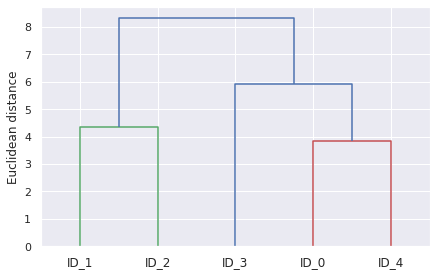

In [0]:
from scipy.cluster.hierarchy import dendrogram

# make dendrogram black (part 1/2)
# from scipy.cluster.hierarchy import set_link_color_palette
# set_link_color_palette(['black'])

row_dendr = dendrogram(row_clusters, 
                       labels=labels,
                       # make dendrogram black (part 2/2)
                       # color_threshold=np.inf
                       )
plt.tight_layout()
plt.ylabel('Euclidean distance')
#plt.savefig('images/11_11.png', dpi=300, 
#            bbox_inches='tight')
plt.show()

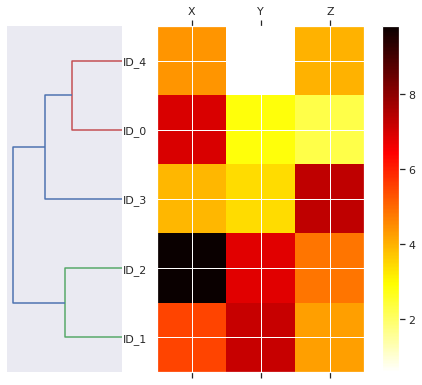

In [0]:
# plot row dendrogram
fig = plt.figure(figsize=(8, 8), facecolor='white')
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])

# note: for matplotlib < v1.5.1, please use orientation='right'
row_dendr = dendrogram(row_clusters, orientation='left')

# reorder data with respect to clustering
df_rowclust = df.iloc[row_dendr['leaves'][::-1]]

axd.set_xticks([])
axd.set_yticks([])

# remove axes spines from dendrogram
for i in axd.spines.values():
    i.set_visible(False)

# plot heatmap
axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])  # x-pos, y-pos, width, height
cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')
fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))

#plt.savefig('images/11_12.png', dpi=300)
plt.show()

In [0]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=3, 
                             affinity='euclidean', 
                             linkage='complete')
labels = ac.fit_predict(X)
print('Cluster labels: %s' % labels)

Cluster labels: [1 0 0 2 1]


In [0]:
ac = AgglomerativeClustering(n_clusters=2, 
                             affinity='euclidean', 
                             linkage='complete')
labels = ac.fit_predict(X)
print('Cluster labels: %s' % labels)

Cluster labels: [0 1 1 0 0]


## Locating regions of high density via DBSCAN¶

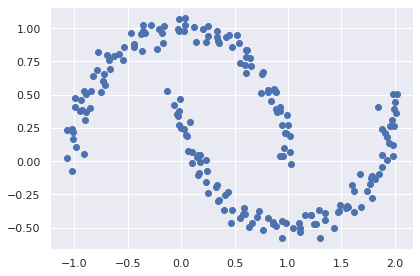

In [0]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
plt.scatter(X[:, 0], X[:, 1])
plt.tight_layout()
#plt.savefig('images/11_14.png', dpi=300)
plt.show()

### K-means and hierarchical clustering:

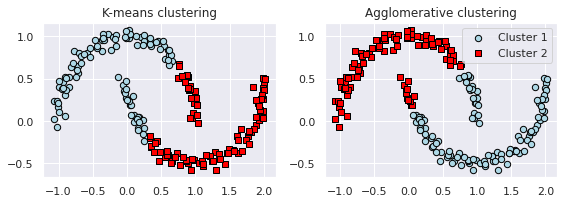

In [0]:

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km == 0, 0], X[y_km == 0, 1],
            edgecolor='black',
            c='lightblue', marker='o', s=40, label='cluster 1')
ax1.scatter(X[y_km == 1, 0], X[y_km == 1, 1],
            edgecolor='black',
            c='red', marker='s', s=40, label='cluster 2')
ax1.set_title('K-means clustering')

ac = AgglomerativeClustering(n_clusters=2,
                             affinity='euclidean',
                             linkage='complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac == 0, 0], X[y_ac == 0, 1], c='lightblue',
            edgecolor='black',
            marker='o', s=40, label='Cluster 1')
ax2.scatter(X[y_ac == 1, 0], X[y_ac == 1, 1], c='red',
            edgecolor='black',
            marker='s', s=40, label='Cluster 2')
ax2.set_title('Agglomerative clustering')

plt.legend()
plt.tight_layout()
#plt.savefig('images/11_15.png', dpi=300)
plt.show()

### DBSCAN

The DBSCAN algorithm views clusters as areas of high density separated by areas of low density. Due to this rather generic view, clusters found by DBSCAN can be any shape, as opposed to k-means which assumes that clusters are convex shaped. The central component to the DBSCAN is the concept of core samples, which are samples that are in areas of high density. A cluster is therefore a set of core samples, each close to each other (measured by some distance measure) and a set of non-core samples that are close to a core sample (but are not themselves core samples). There are two parameters to the algorithm, min_samples and eps, which define formally what we mean when we say dense. Higher min_samples or lower eps indicate higher density necessary to form a cluster.

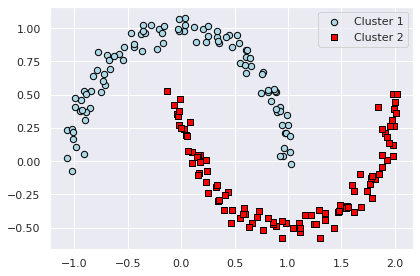

In [0]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
y_db = db.fit_predict(X)
plt.scatter(X[y_db == 0, 0], X[y_db == 0, 1],
            c='lightblue', marker='o', s=40,
            edgecolor='black', 
            label='Cluster 1')
plt.scatter(X[y_db == 1, 0], X[y_db == 1, 1],
            c='red', marker='s', s=40,
            edgecolor='black', 
            label='Cluster 2')
plt.legend()
plt.tight_layout()
#plt.savefig('images/11_16.png', dpi=300)
plt.show()

- eps: float, default=0.5
The maximum distance between two samples for one to be considered as in the neighborhood of the other. This is not a maximum bound on the distances of points within a cluster. This is the most important DBSCAN parameter to choose appropriately for your data set and distance function.

- min_samples: int, default=5
The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself.

- metric: string, or callable, default=’euclidean’
The metric to use when calculating distance between instances in a feature array. If metric is a string or callable, it must be one of the options allowed by sklearn.metrics.pairwise_distances for its metric parameter. If metric is “precomputed”, X is assumed to be a distance matrix and must be square. X may be a Glossary, in which case only “nonzero” elements may be considered neighbors for DBSCAN.

New in version 0.17: metric precomputed to accept precomputed sparse matrix.